In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import scipy.stats as stats
import statsmodels as sm

import pandas_profiling

import sklearn as sk
from sklearn import metrics

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [4]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [5]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [6]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode().iloc[0])
    return x

In [7]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

# IMPORT DATA

In [8]:
consumption=pd.read_excel(r'C:\Users\Deepika\Downloads\ML\CreditConsumptionData.xlsx')
consumption.head(2)

ID  cc_cons
0  12554  20014.0
1  17645  10173.0

In [9]:
behavior=pd.read_excel(r'C:\Users\Deepika\Downloads\ML\CustomerBehaviorData.xlsx')
behavior.head(2)

ID  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun loan_enq  emi_active
0  17051      3412.60      2909.34      1077.36      3084.50      4615.97       6693.0          19.0            10             2            53             1            42    358000                     1                    1                   1.0                    1         331.2      130000.0      300500.0       12174.0          25210.23           27532.37            103.0                36                28579.0          44974.63            42852.0                 1              108                97916.0          45253.64            47635.0                 2               18                19947.0        Y     3448.84
1  11491     18133.76      3877.00      6123.78      5597.43     64620.00       6117.0           4.0            60             1             4             1            17    114000                     1                    1                   1.0                    1     5809950.0           3.0      610000.0        2351.0          30937.00           50784.00             40.0                35                25379.0         117575.67            24257.0                 1                4                25125.0          12912.33            18369.0                 3               49                20585.0        Y     3812.69

In [10]:
cust=pd.read_excel(r'C:\Users\Deepika\Downloads\ML\CustomerDemographics.xlsx')
cust.head(2)

ID account_type gender  age  Income  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction
0  19427      current      M   63  MEDIUM              30.1                10        628.0                1                           5.0
1  16150      current      M   36  MEDIUM              14.4                10        656.0                0                          12.0

# MERGING DATASET

In [11]:
d1=pd.merge(left=consumption,right=cust,on='ID')
final_tbl=pd.merge(left=d1,right=behavior,on='ID')

# DATA AUDIT

In [12]:
final_tbl.head(5)

ID  cc_cons account_type gender  age  Income  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun loan_enq  emi_active
0  12554  20014.0      current      M   35  MEDIUM              15.0                 1        708.0                0                          17.0     24893.00       378.00     10288.00     29664.00     16291.40     11432.00           2.0            26            10            48            14            47    430000                     1                    1                   1.0                    1        593.20       1244.14         787.0        6885.0          85919.48           25192.00             24.0                 6                25296.0          11527.50          191777.13                 2               40                24563.0          30051.32            12761.0                 2               65                50836.0        Y     1674.09
1  17645  10173.0      current      M   35    HIGH              15.0                 6        123.0                0                          14.0     18941.62       966.00     20672.00       287.00      4217.00       885.00           1.0             7            13             3            21            31    127500                     1                    1                   1.0                    1     213557.15     172678.56       90525.0        1500.0          12255.75           88693.37             35.0                36                80750.0          92276.57           71162.00                 2               78                23948.0          42119.05            76206.0                21               63                23226.0        Y    13043.34
2   7604  16095.0      current      M   55  MEDIUM              24.5                 1        802.0                1                           3.0      5678.87      2724.00      1964.50      3933.11     23956.25      5168.00          43.0            32           102             4             1            80    199999                     1                    1                   1.0                    1     165907.57     470000.00       25524.0        3735.0          34193.00           84880.00             72.0                 9                38466.0          19343.00           70978.00                 2               82                10752.0          58373.25            75283.0                 7                1                27036.0        Y    25375.27
3   1590   7707.0      current      F   29  MEDIUM               4.5                 6        867.0                1                           4.0     30489.50      1236.00     12609.88      9138.14     17521.00     13650.30          53.0             1            50             1             1            10    155000                     1                    1                   1.0                    1      81872.65     223379.40       48500.0       -4679.0          11558.23          236326.00             43.0                30                52732.0          43867.91           63033.84                23               38                12607.0          69851.51            68708.0                21               83                43037.0        Y     3544.33
4  16556  96408.0      current      M   34  MEDIUM              12.6                 4        802.0                1                           7.0      7441.40      6906.0

In [13]:
final_tbl.tail(5)

ID  cc_cons account_type gender  age  Income  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun loan_enq  emi_active
19995  12512      NaN      current      M   35  MEDIUM              13.5                 1        523.0                0                           7.0     4641.500      5979.58      6008.61      4410.00     41743.00      1884.00          26.0             1             4             1             2            26    595000                     1                    1                   1.0                    1      84446.00     961916.90         492.0         553.0          41314.91           37646.41              6.0                14                27825.0          34952.75           45461.00                35               11                32944.0         105488.53          125470.83                21               50                58037.0        Y     7870.88
19996  14224      NaN      current      M   53  MEDIUM               9.9                 7        723.0                1                           2.0     4994.450      2805.37     23214.00      5870.00      1041.00      1008.73          37.0            56            50            18             1            58     13000                     1                    1                   1.0                    1    1892440.00     295150.90       10271.0       20324.0            216.25            1605.00             32.0                26                27912.0          17261.41           85422.00                 5                8                 8850.0          77112.66           86559.00                62               38                24110.0        Y     3668.30
19997  18740      NaN      current      M   62    HIGH              37.8                 8        863.0                1                          16.0     3262.145      2871.00      7335.25     11774.04      4130.00      1413.00          12.0            77             1             1             2            17    124000                     1                    1                   1.0                    1        115.45     200015.58       30000.0        6885.0          89327.00           80044.00             32.0                14                14580.0         142002.00           68985.86                10              108                35819.0          57192.48           80627.00                 2               18                 1769.0        Y     5450.34
19998  18134      NaN      current      M   34  MEDIUM              12.6                 4        882.0                0                          13.0    12824.010      4866.00     12242.48       284.00     15132.77     37911.00          67.0             1             4             1            44            67    371000                     1                    1                   1.0                    1      48796.45       1631.11         925.0       10455.0         191780.00           66057.00             40.0                 5                23881.0         156995.05           13558.00                11               12                39083.0          82039.00           24332.00               117               64                37255.0        Y       59.29
19999  12413      NaN      current      M   27     LOW               3.5                 8        447.0                1                           NaN    2

In [14]:
final_tbl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   account_type                  19999 non-null  object 
 3   gender                        19999 non-null  object 
 4   age                           20000 non-null  int64  
 5   Income                        19999 non-null  object 
 6   Emp_Tenure_Years              20000 non-null  float64
 7   Tenure_with_Bank              20000 non-null  int64  
 8   region_code                   19999 non-null  float64
 9   NetBanking_Flag               20000 non-null  int64  
 10  Avg_days_between_transaction  19997 non-null  float64
 11  cc_cons_apr                   20000 non-null  float64
 12  dc_cons_apr                   20000 non-null  float64
 13  c

In [15]:
final_tbl.isna().sum()

ID                                 0
cc_cons                         5000
account_type                       1
gender                             1
age                                0
Income                             1
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        1
NetBanking_Flag                    0
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
v

In [16]:
train= final_tbl[final_tbl.cc_cons.isnull()==0]
test= final_tbl[final_tbl.cc_cons.isnull()==1]

In [17]:
train.head(5)

ID  cc_cons account_type gender  age  Income  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun loan_enq  emi_active
0  12554  20014.0      current      M   35  MEDIUM              15.0                 1        708.0                0                          17.0     24893.00       378.00     10288.00     29664.00     16291.40     11432.00           2.0            26            10            48            14            47    430000                     1                    1                   1.0                    1        593.20       1244.14         787.0        6885.0          85919.48           25192.00             24.0                 6                25296.0          11527.50          191777.13                 2               40                24563.0          30051.32            12761.0                 2               65                50836.0        Y     1674.09
1  17645  10173.0      current      M   35    HIGH              15.0                 6        123.0                0                          14.0     18941.62       966.00     20672.00       287.00      4217.00       885.00           1.0             7            13             3            21            31    127500                     1                    1                   1.0                    1     213557.15     172678.56       90525.0        1500.0          12255.75           88693.37             35.0                36                80750.0          92276.57           71162.00                 2               78                23948.0          42119.05            76206.0                21               63                23226.0        Y    13043.34
2   7604  16095.0      current      M   55  MEDIUM              24.5                 1        802.0                1                           3.0      5678.87      2724.00      1964.50      3933.11     23956.25      5168.00          43.0            32           102             4             1            80    199999                     1                    1                   1.0                    1     165907.57     470000.00       25524.0        3735.0          34193.00           84880.00             72.0                 9                38466.0          19343.00           70978.00                 2               82                10752.0          58373.25            75283.0                 7                1                27036.0        Y    25375.27
3   1590   7707.0      current      F   29  MEDIUM               4.5                 6        867.0                1                           4.0     30489.50      1236.00     12609.88      9138.14     17521.00     13650.30          53.0             1            50             1             1            10    155000                     1                    1                   1.0                    1      81872.65     223379.40       48500.0       -4679.0          11558.23          236326.00             43.0                30                52732.0          43867.91           63033.84                23               38                12607.0          69851.51            68708.0                21               83                43037.0        Y     3544.33
4  16556  96408.0      current      M   34  MEDIUM              12.6                 4        802.0                1                           7.0      7441.40      6906.0

In [18]:
test.head(5)

ID  cc_cons account_type gender  age  Income  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun loan_enq  emi_active
15000  17591      NaN      current      M   37  MEDIUM              11.9                 4        575.0                1                          16.0      2795.45       1290.0      6141.05       676.50      9146.10     15479.00           4.0            10             4            47            56             6    125000                     1                    1                   1.0                    1         13.80     376600.50        1633.0   -5715.49023          27646.84           44341.00             16.0                36                24485.0          23512.67            41755.0                24               20                 9750.0          30527.88           31271.00                 3               12               25945.92        Y     1170.49
15001  13541      NaN      current      M   33  MEDIUM               7.8                 6        394.0                0                          19.0     29405.13       1640.0      1670.00      2463.92     10947.50       956.00           3.0            10             4            50            38            31     59000                     1                    1                   1.0                    1     101891.25     470000.00         891.0   35346.00000          32247.25           21946.00             42.0                 5                 3375.0          15049.44           130299.0                43               40                16967.0          14342.83           16582.00                 6               39               12214.00        Y    16447.45
15002  13431      NaN      current      M   53     LOW              33.0                10        324.0                1                          15.0      5985.20       6189.0      2696.09       766.00       716.00      4133.22           7.0            30             5            24            27             2     49999                     1                    1                   1.0                    1      53374.97     674291.83       54101.0    2557.00000          63169.00           36616.50             41.0                 6                14950.0         133659.00            40422.0                42               35                36398.0          32503.16           33539.54                 5                9               13215.00        Y     2622.28
15003   8687      NaN      current      M   33  MEDIUM               7.8                 5        370.0                1                           7.0      2105.93      18225.0     34763.56       167.00      4260.27     20185.00           1.0            99            71             5             1            11    520000                     1                    1                   1.0                    1       9118.35     470000.00        5905.0    5464.00000          39442.80           43173.38             46.0                 1               235844.0          99686.03            48148.0                 3                5                97825.0          93572.42          109429.75                21                0               72317.00        Y      340.79
15004  14727      NaN      current      M   62     LOW              12.6                 9        505.0                1                           3.0     

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   account_type                  15000 non-null  object 
 3   gender                        15000 non-null  object 
 4   age                           15000 non-null  int64  
 5   Income                        15000 non-null  object 
 6   Emp_Tenure_Years              15000 non-null  float64
 7   Tenure_with_Bank              15000 non-null  int64  
 8   region_code                   15000 non-null  float64
 9   NetBanking_Flag               15000 non-null  int64  
 10  Avg_days_between_transaction  14999 non-null  float64
 11  cc_cons_apr                   15000 non-null  float64
 12  dc_cons_apr                   15000 non-null  float64
 13  c

In [20]:
train.shape

(15000, 49)

In [21]:
print(list(train.columns))

['ID', 'cc_cons', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active']


In [22]:
train.nunique()

ID                              15000
cc_cons                         12260
account_type                        2
gender                              2
age                                43
Income                              3
Emp_Tenure_Years                  270
Tenure_with_Bank                   10
region_code                       210
NetBanking_Flag                     2
Avg_days_between_transaction       19
cc_cons_apr                      7408
dc_cons_apr                      3638
cc_cons_may                      7461
dc_cons_may                      3786
cc_cons_jun                      6525
dc_cons_jun                      2874
cc_count_apr                       50
cc_count_may                       58
cc_count_jun                       67
dc_count_apr                       41
dc_count_may                       39
dc_count_jun                       54
card_lim                          308
personal_loan_active                1
vehicle_loan_active                 1
personal_loa

# UNIVARIATE ANALYSIS

Univariate major purpose is to describe; It takes data, summarizes that data and finds patterns in the data and to see distribution of variables

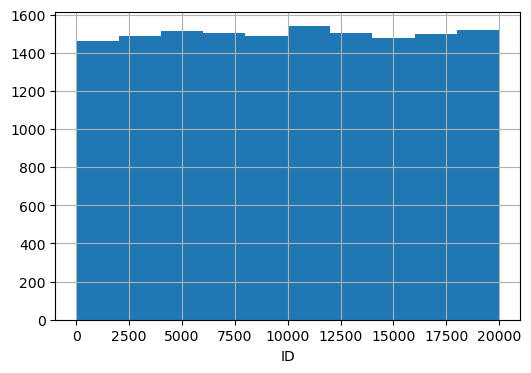

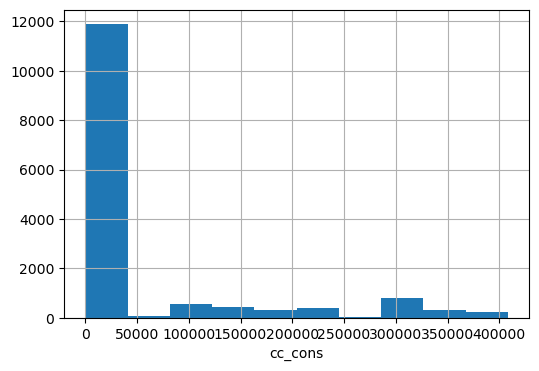

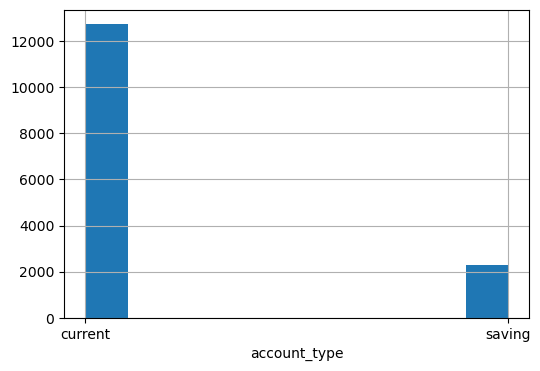

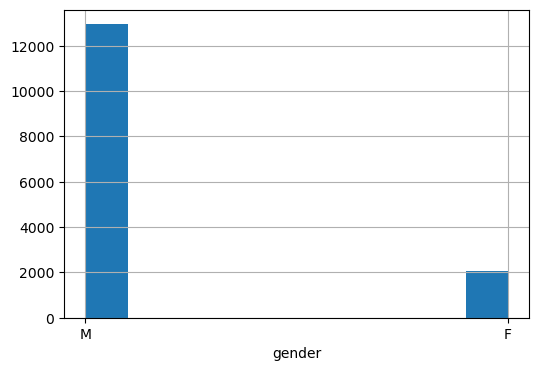

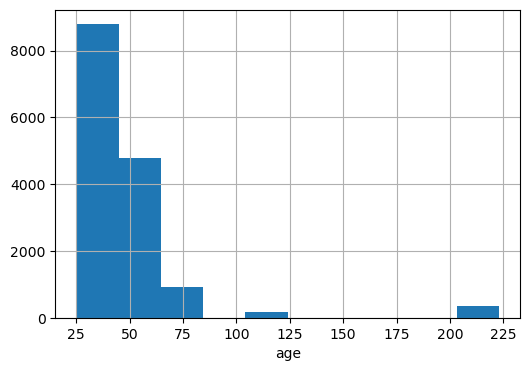

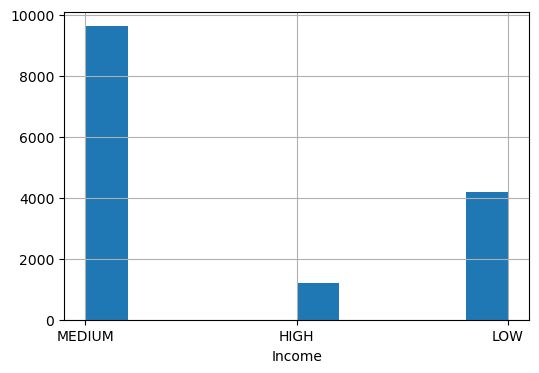

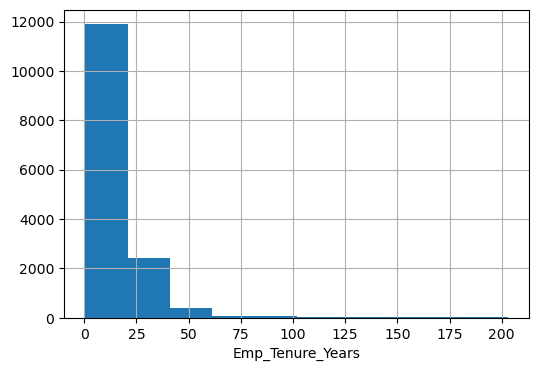

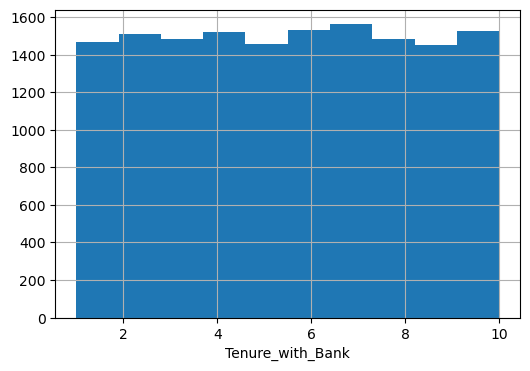

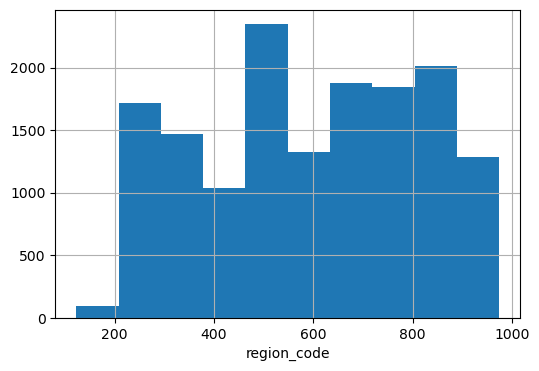

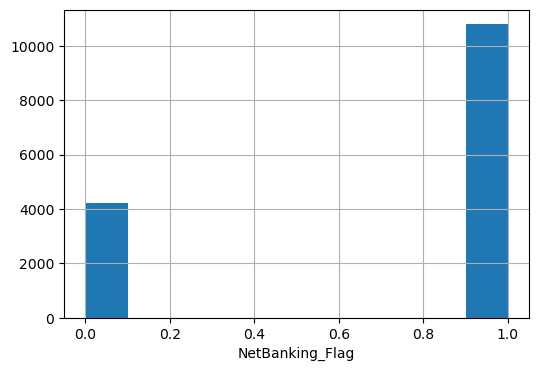

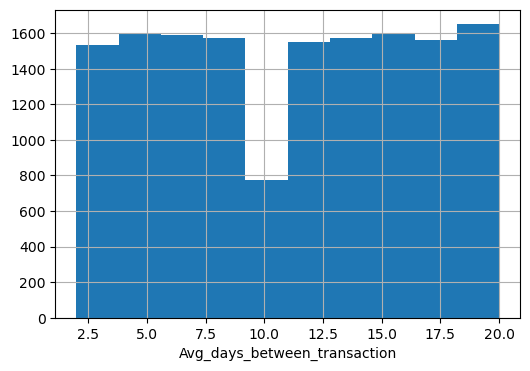

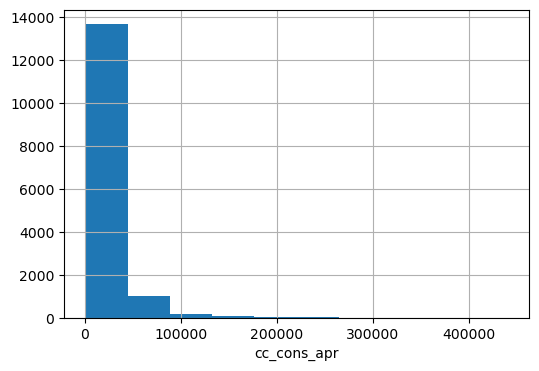

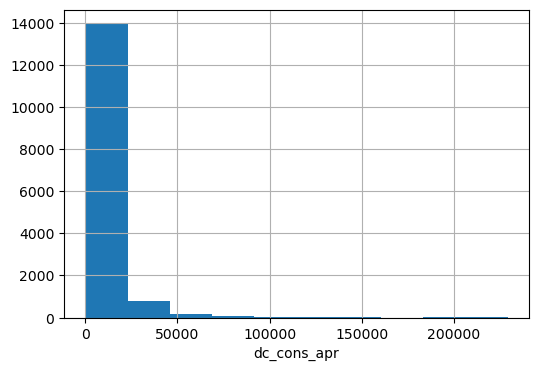

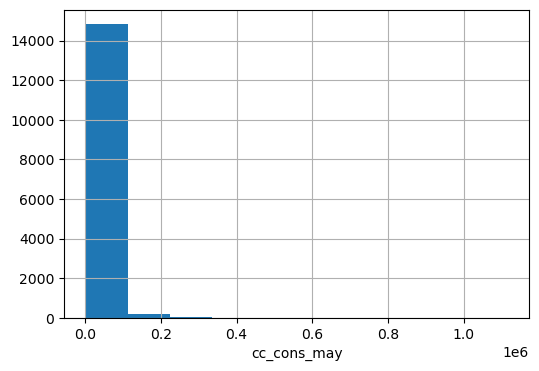

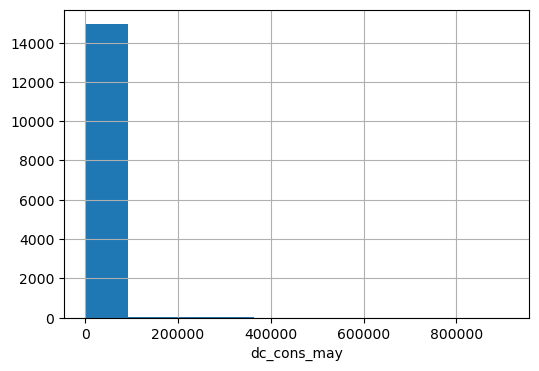

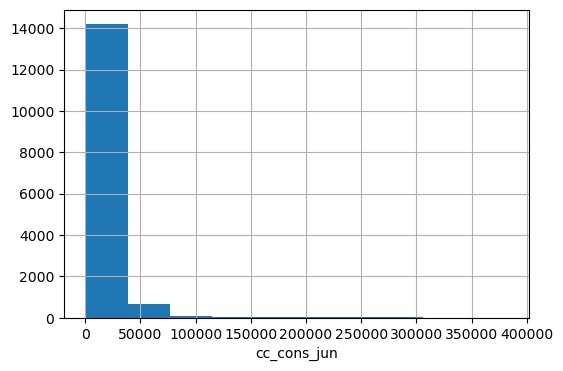

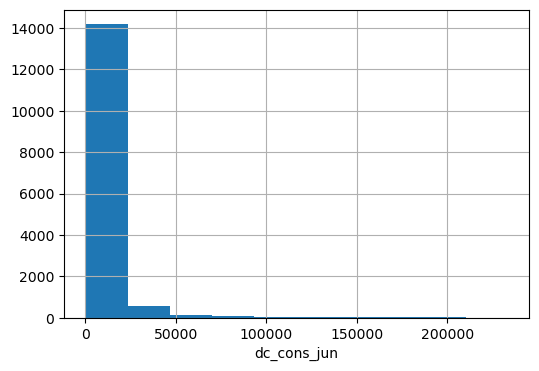

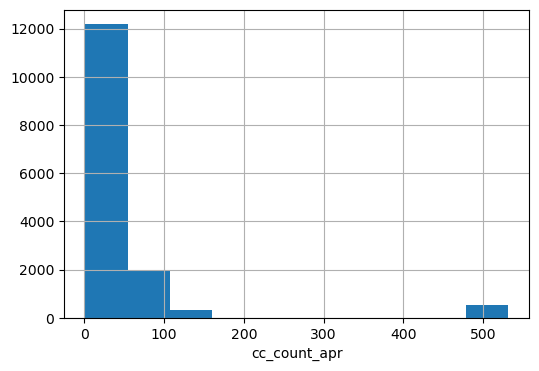

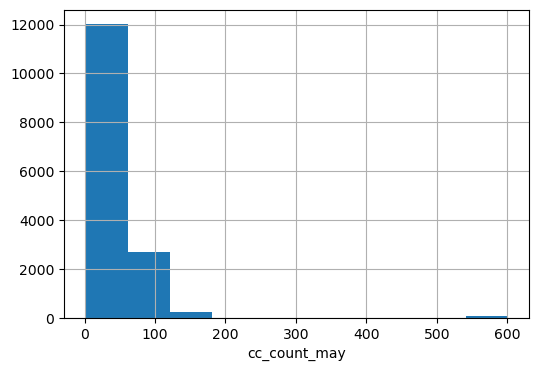

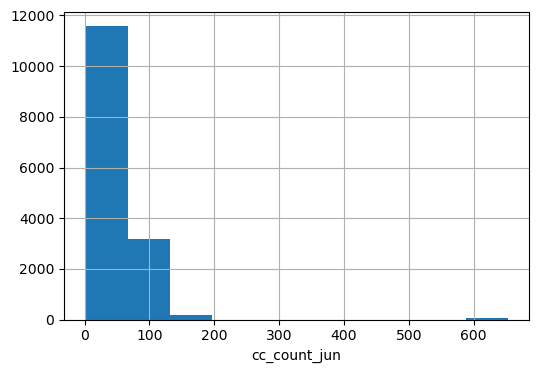

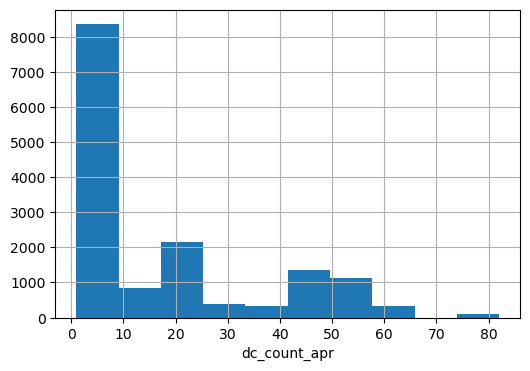

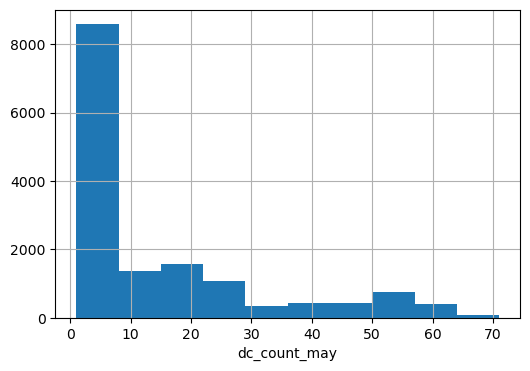

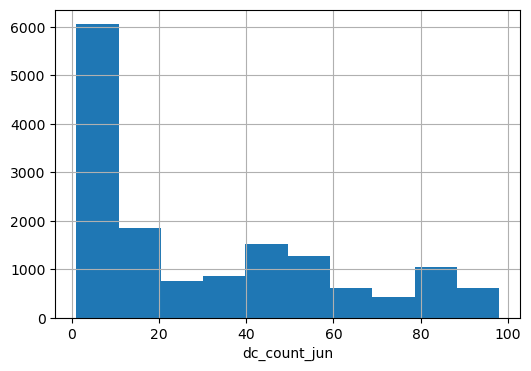

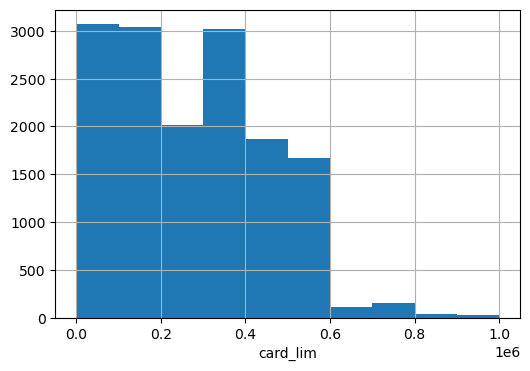

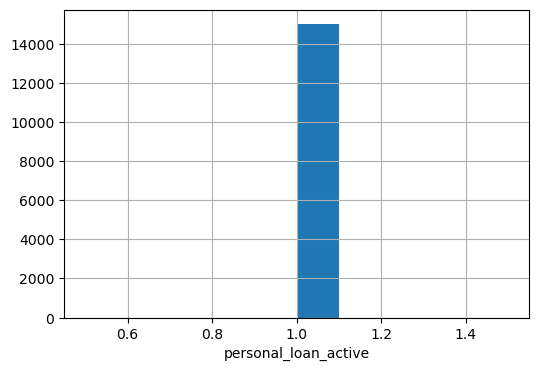

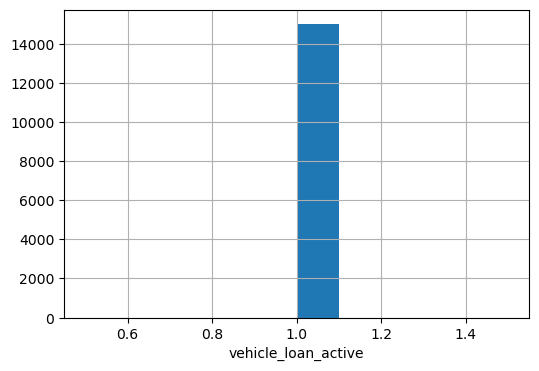

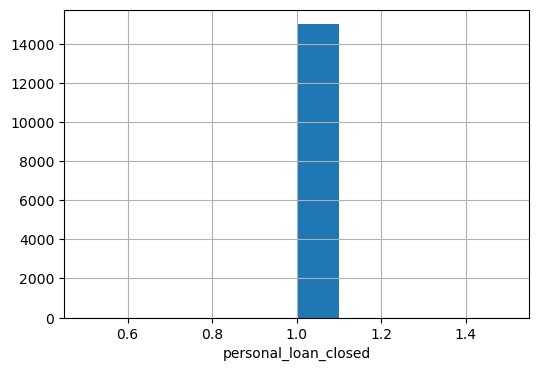

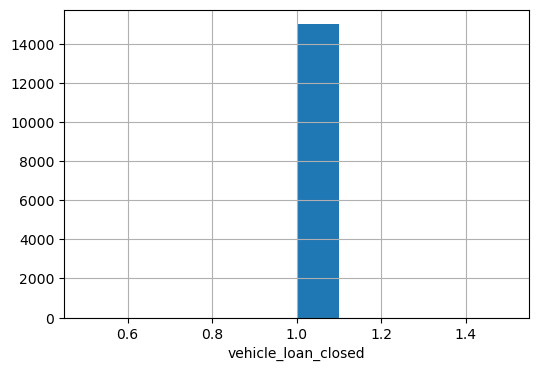

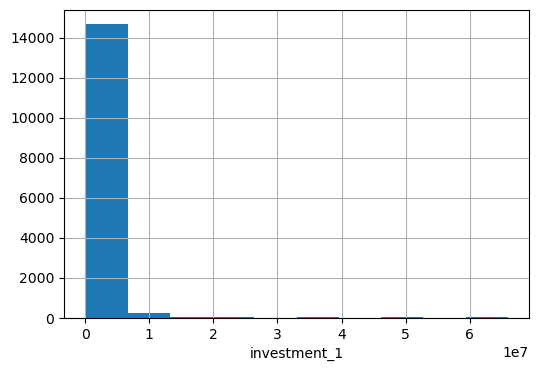

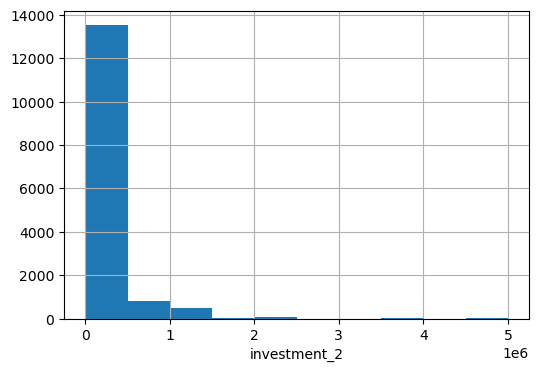

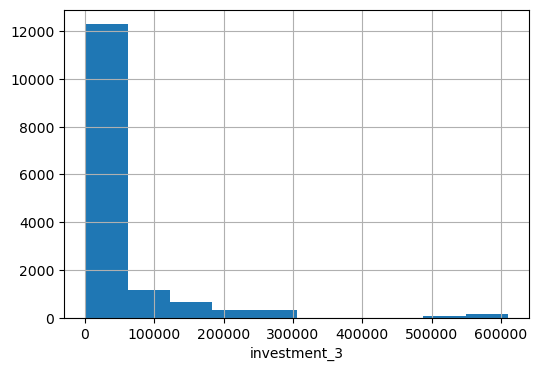

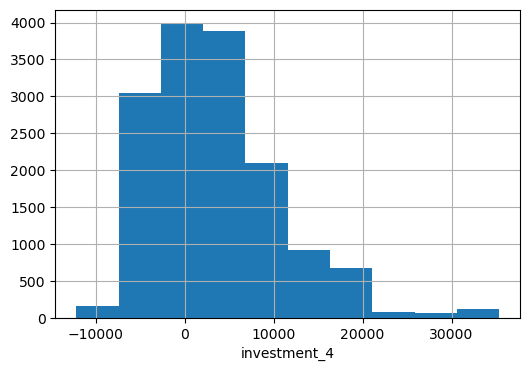

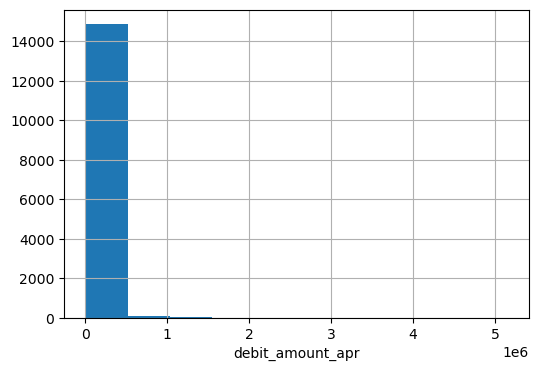

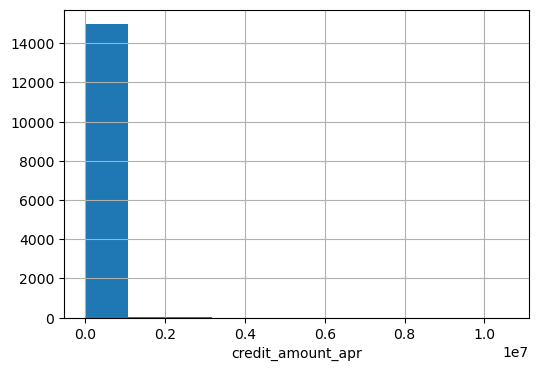

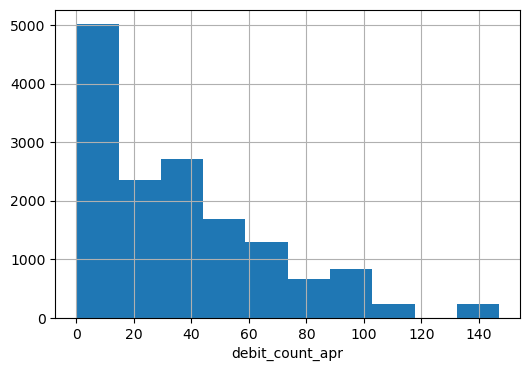

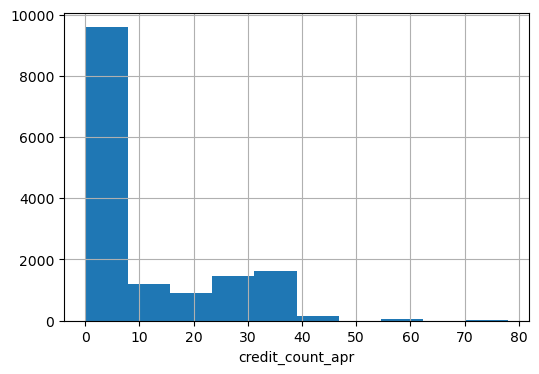

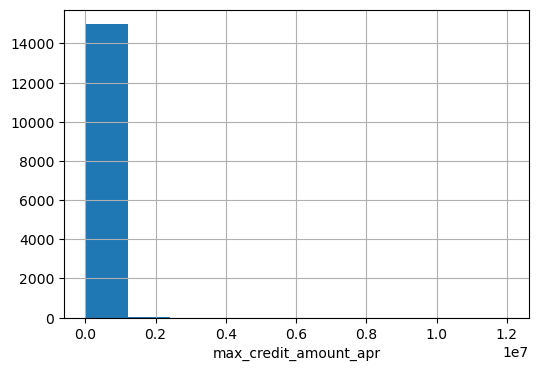

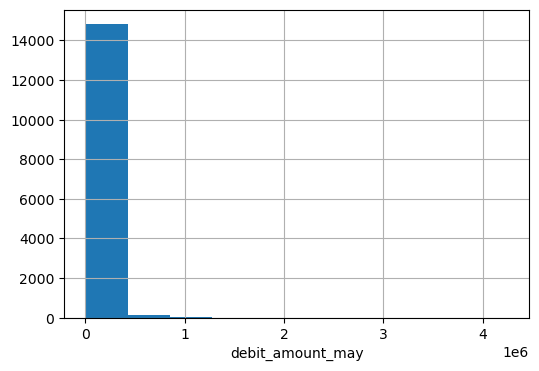

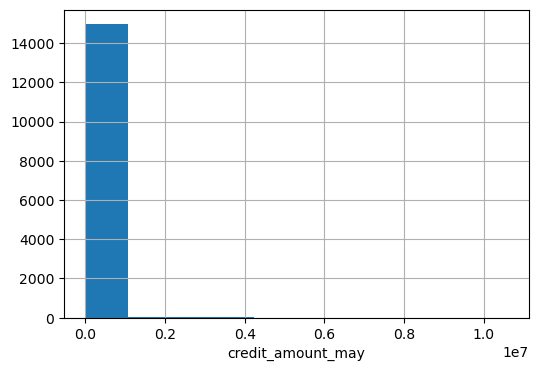

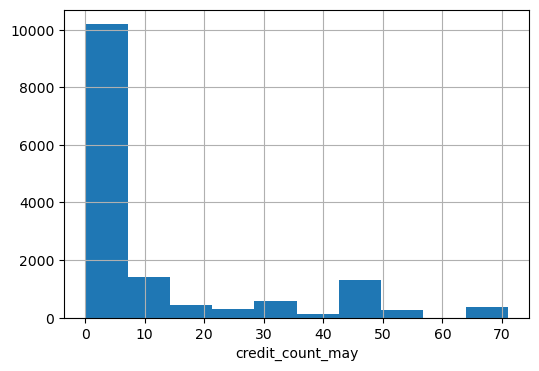

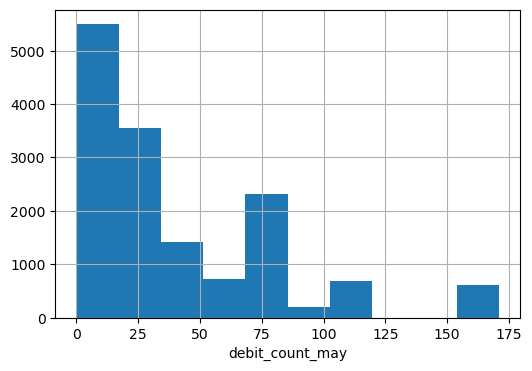

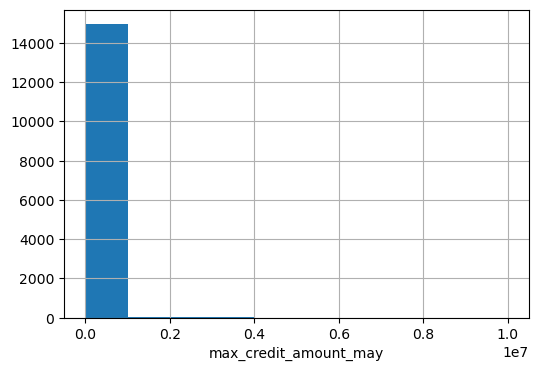

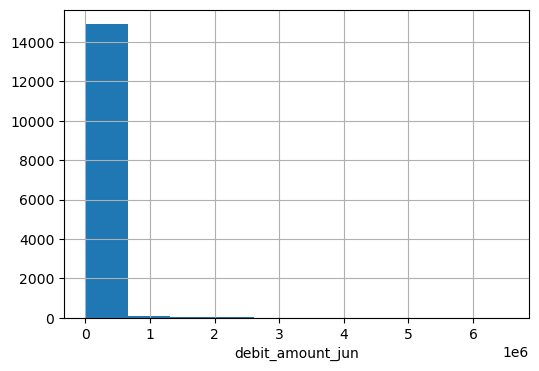

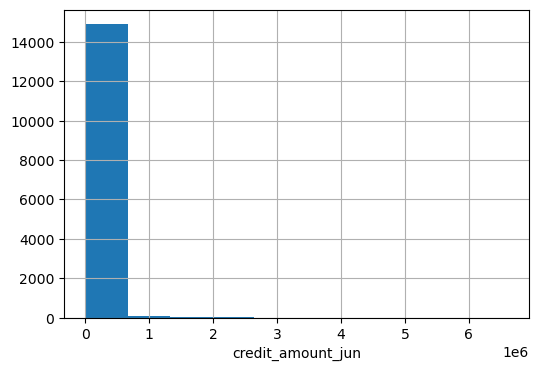

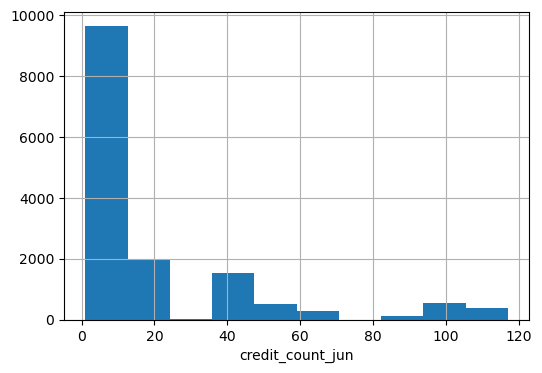

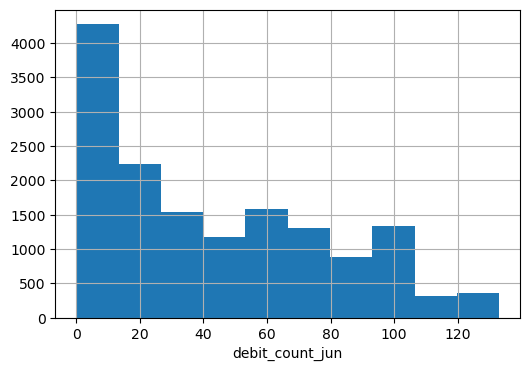

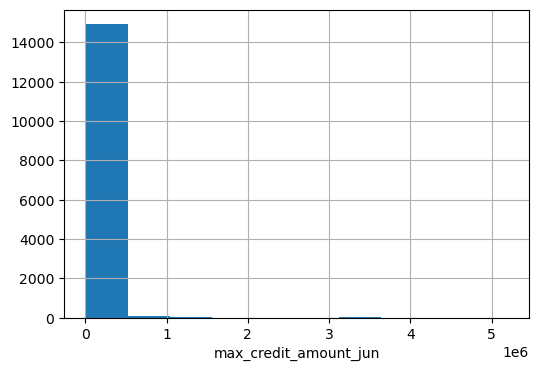

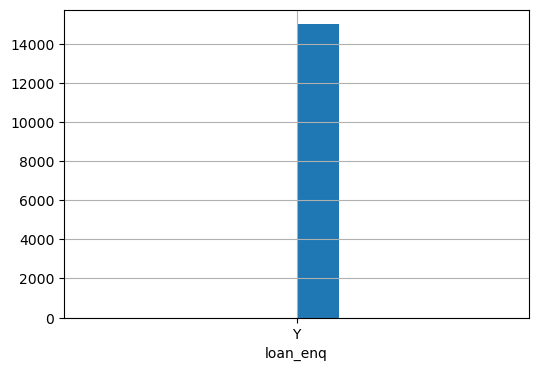

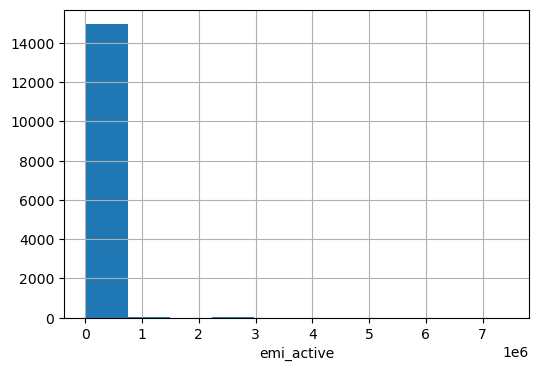

In [24]:
for i in train.columns:
    train[i].hist()
    plt.xlabel(str(i))
    plt.show()

# BIVARIATE ANALYSIS

It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

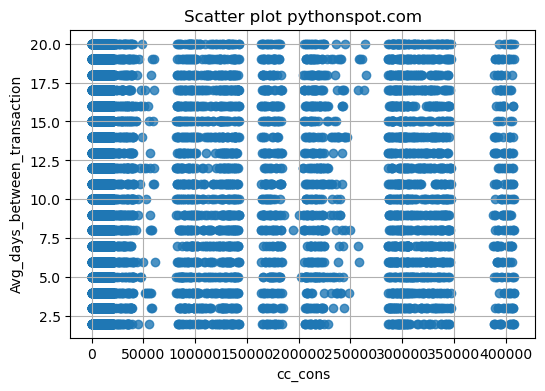

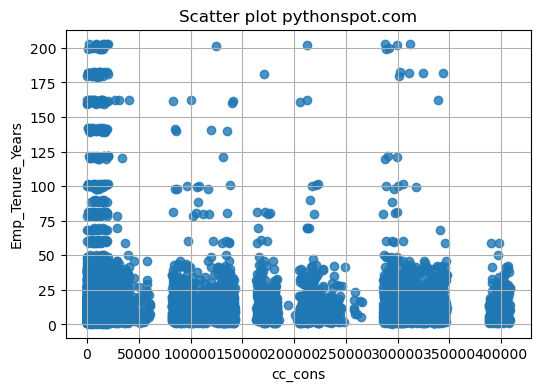

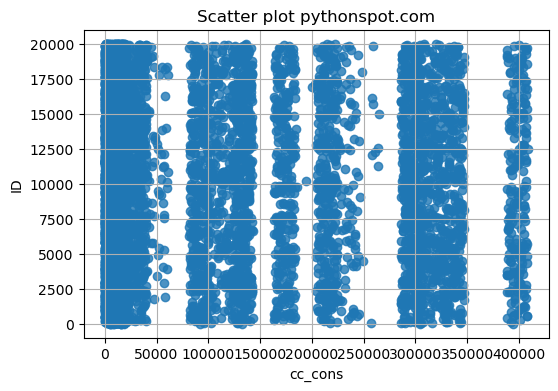

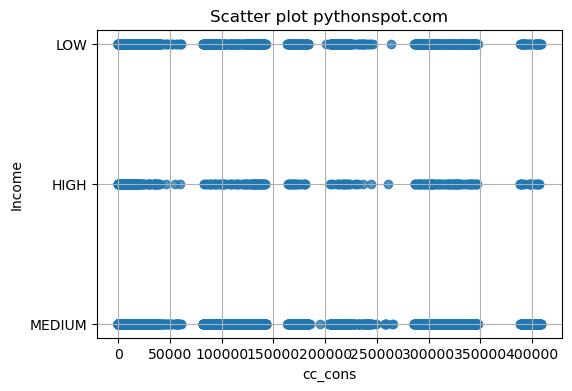

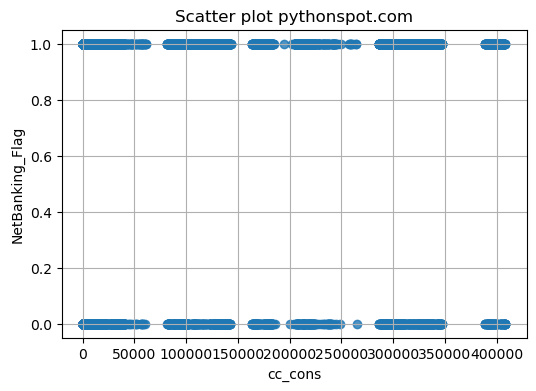

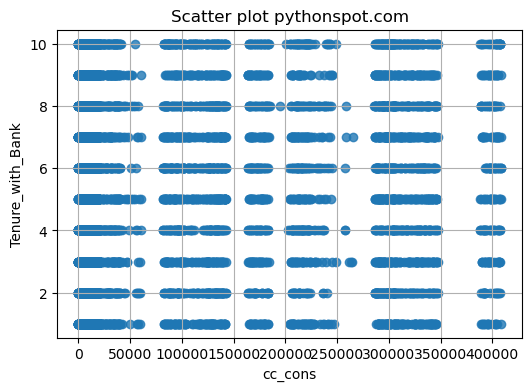

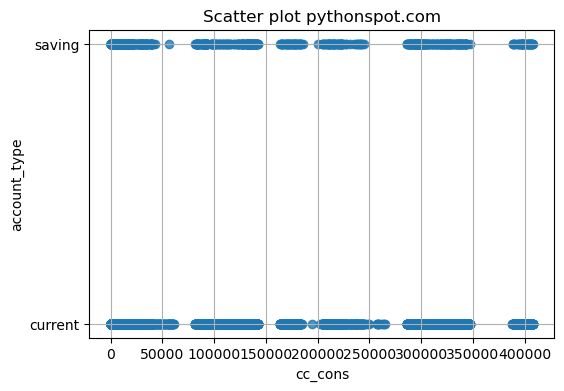

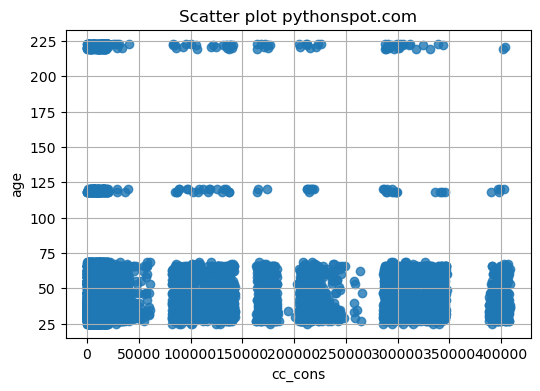

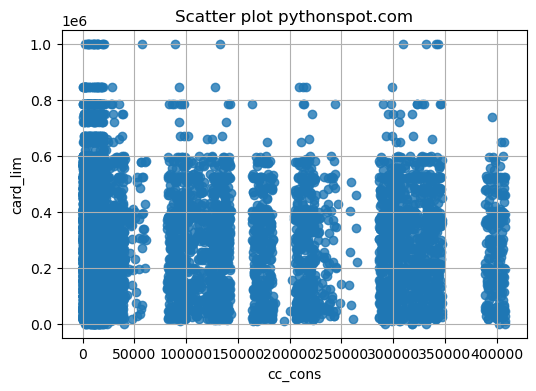

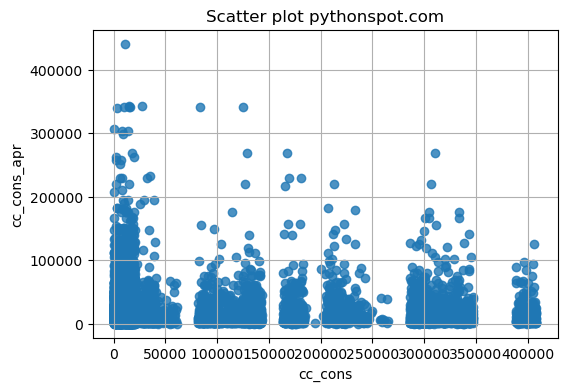

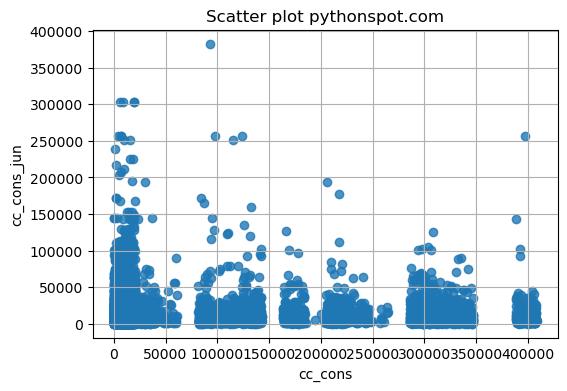

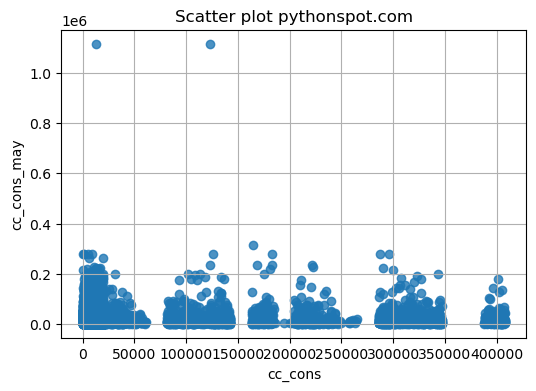

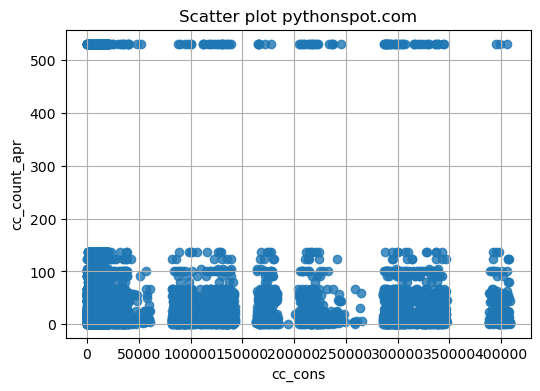

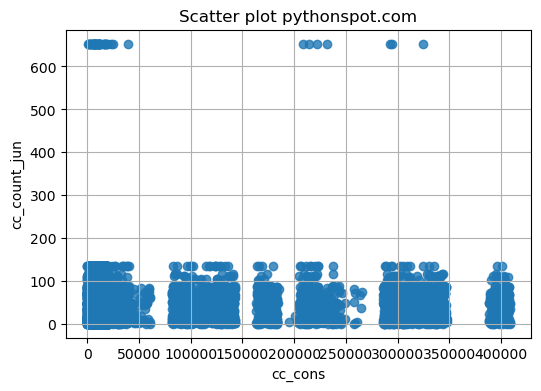

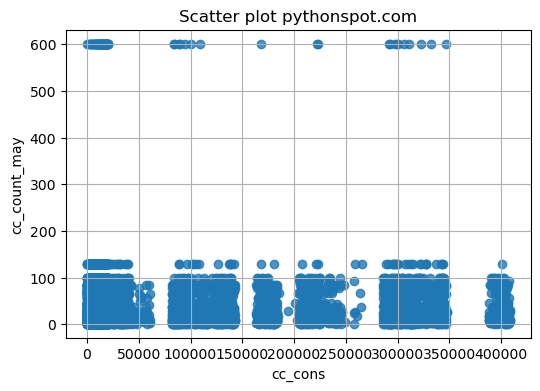

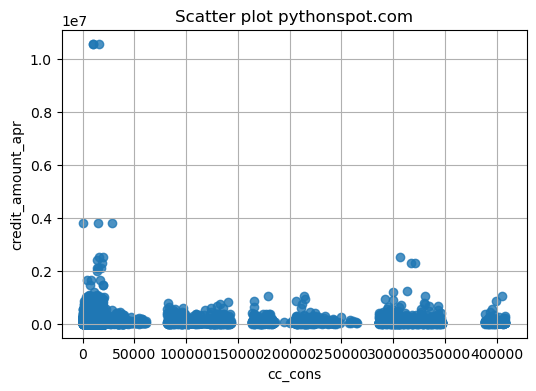

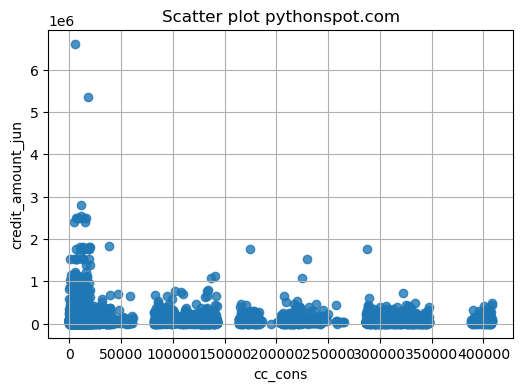

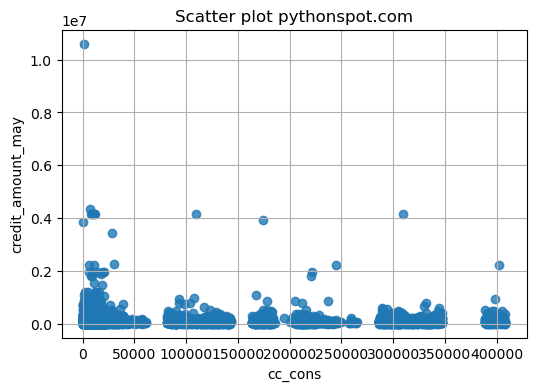

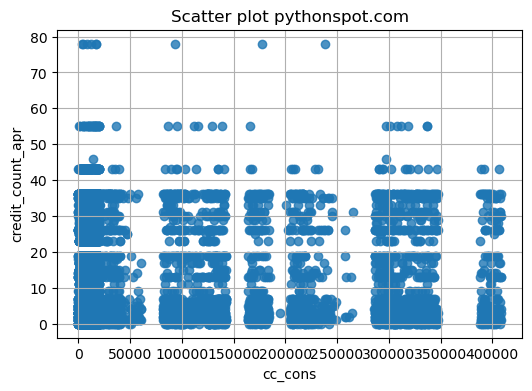

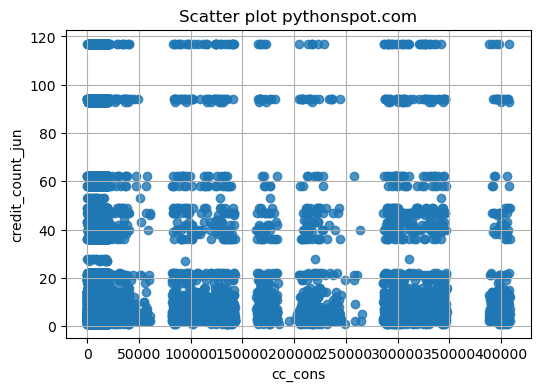

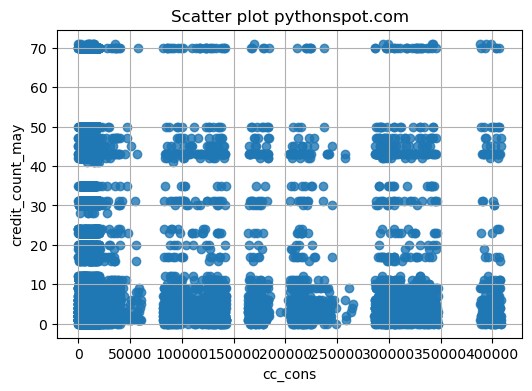

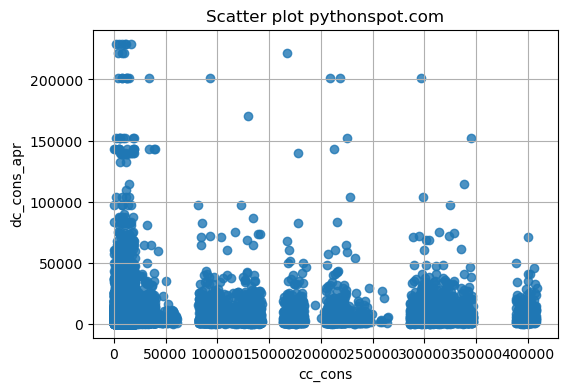

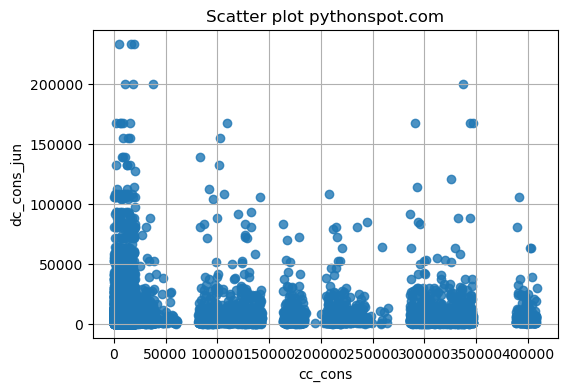

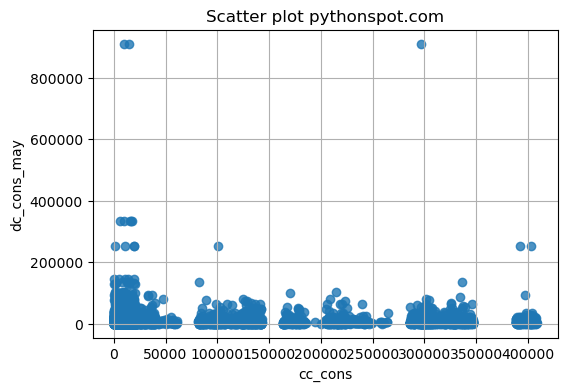

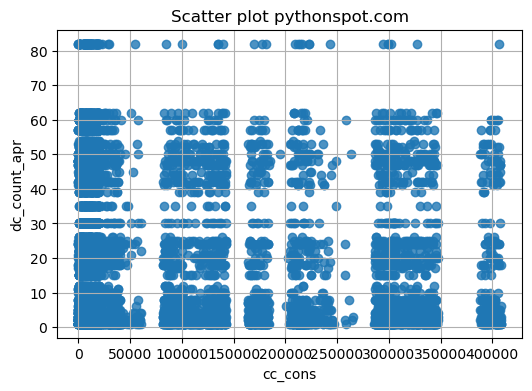

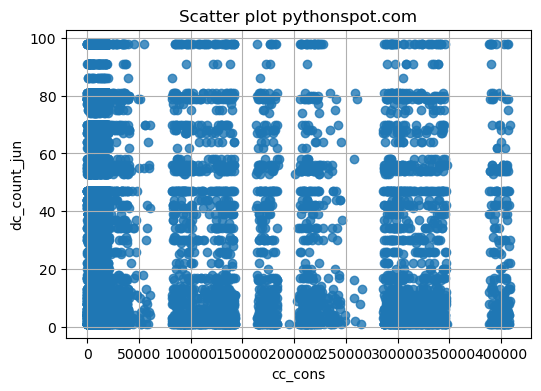

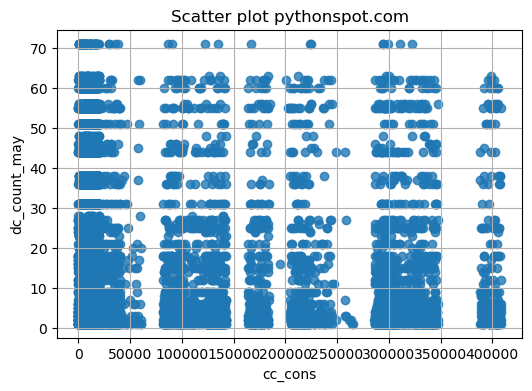

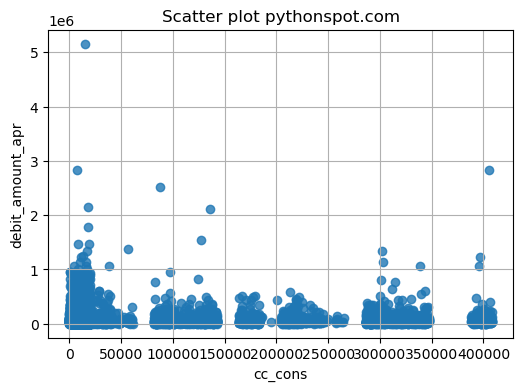

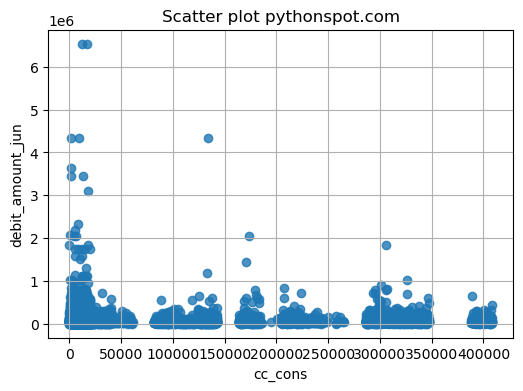

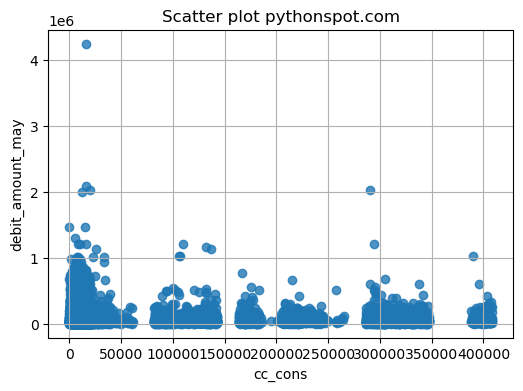

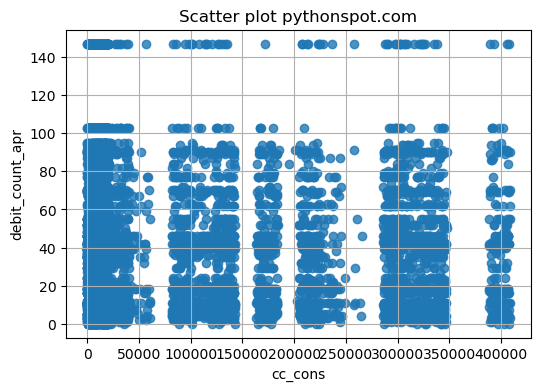

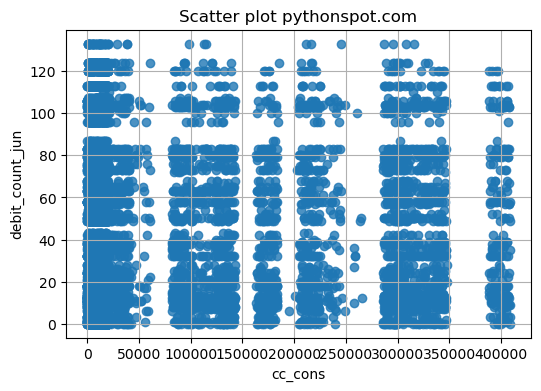

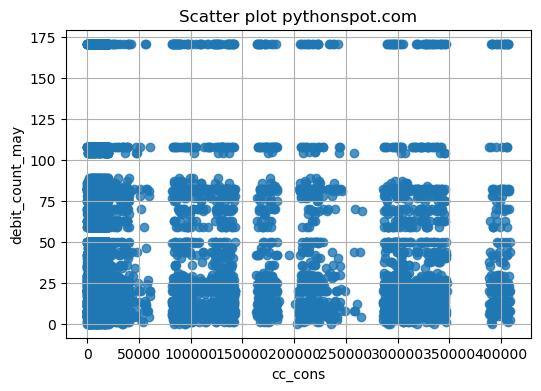

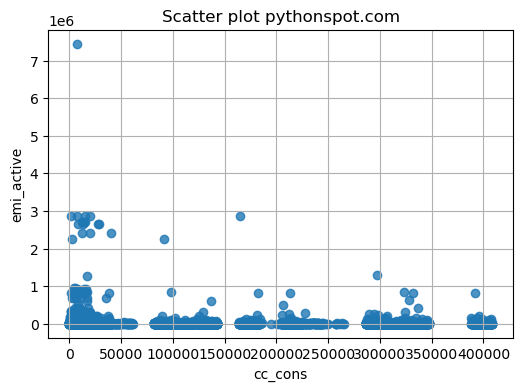

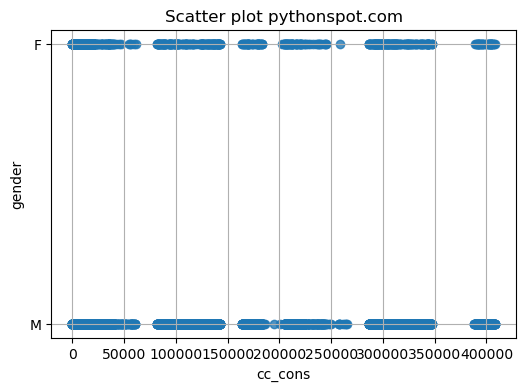

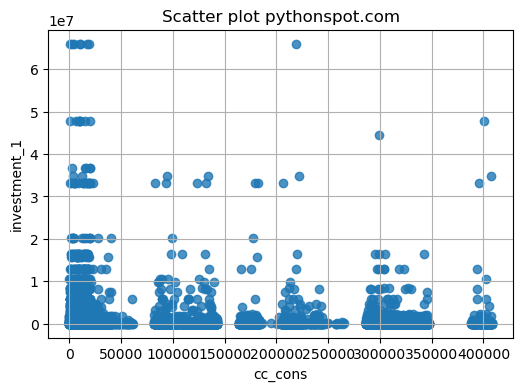

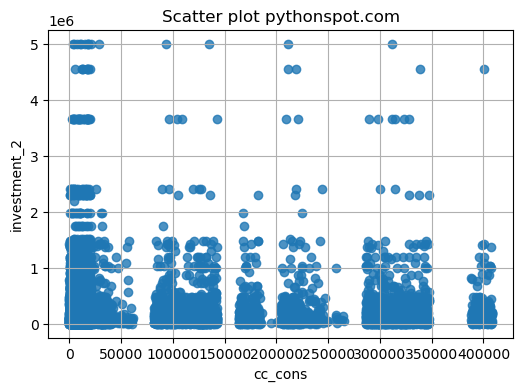

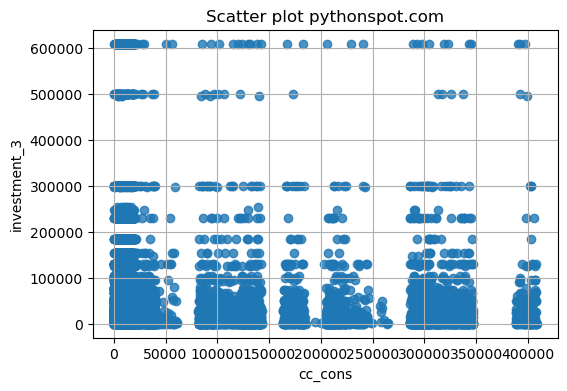

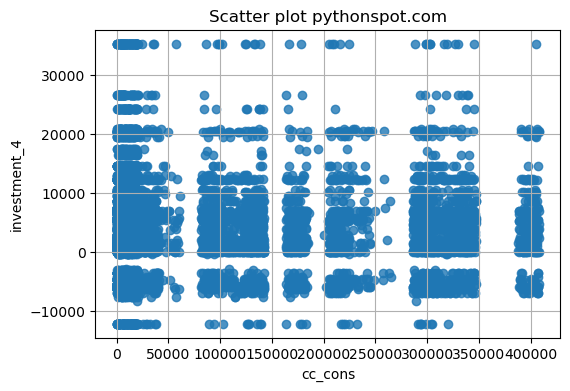

TypeError: 'value' must be an instance of str or bytes, not a float

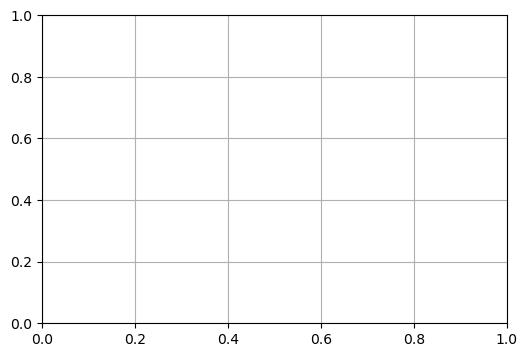

In [25]:
# Checking Bi-Variate Relationship with taget variable
for i in train.columns.difference(['cc_cons']):
    plt.scatter(train.cc_cons,train[i], alpha=0.8)
    plt.title('Scatter plot pythonspot.com')
    plt.xlabel('cc_cons')
    plt.ylabel(str(i))
    plt.show()  

In [26]:
#profile_report= pandas_profiling.ProfileReport(train)
#profile_report.to_file('profileReport.html')

In [27]:
train.describe()

ID        cc_cons           age  Emp_Tenure_Years  Tenure_with_Bank   region_code  NetBanking_Flag  Avg_days_between_transaction    cc_cons_apr    dc_cons_apr   cc_cons_may    dc_cons_may    cc_cons_jun    dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun        card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2   investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun    emi_active
count  15000.000000   15000.000000  15000.000000      15000.000000      15000.000000  15000.000000     15000.000000                  14999.000000   15000.000000   15000.000000  1.500000e+04   15000.000000   15000.000000   15000.000000  14999.000000  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000    15000.000000               15000.0              15000.0               14999.0              15000.0  1.500000e+04  1.500000e+04   14998.000000  15000.000000      1.500000e+04       1.500000e+04     14999.000000      15000.000000           1.500000e+04      1.500000e+04       1.500000e+04      15000.000000     15000.000000           1.500000e+04      1.500000e+04       1.500000e+04      15000.000000     15000.000000           1.500000e+04  1.499900e+04
mean   10032.077067   55157.729867     47.790600         15.184007          5.510000    598.415467         0.719533                     11.049603   17957.391719    8171.098287  1.633705e+04    7703.605203   12129.010832    7097.395321     41.489499     33.490200     41.507000     17.171000     13.979733     30.287267   277005.147400                   1.0                  1.0                   1.0                  1.0  6.194140e+05  2.333642e+05   44440.944719   3523.049025      6.823421e+04       8.079761e+04        36.402227         11.291400           5.438954e+04      6.554492e+04       8.356935e+04         11.923133        40.996867           5.718791e+04      7.615987e+04       7.850316e+04         19.946400        44.647867           5.258654e+04  1.576139e+04
std     5760.372343   97670.972252     30.632766         20.312648          2.865783    220.062345         0.449242                      5.492379   25187.939958   14773.029481  2.706085e+04   18987.296785   18488.781136   13251.695907     97.435394     49.540999     47.342918     19.359678     17.087203     29.252490   179429.540139                   0.0                  0.0                   0.0                  0.0  3.087815e+06  4.073237e+05   88117.933782   7373.355434      1.126786e+05       1.989060e+05        30.701081         12.670785           1.950943e+05      1.016829e+05       1.776300e+05         16.843563        40.537354           2.000194e+05      1.545112e+05       1.482005e+05         27.200165        35.089082           1.282601e+05  1.179191e+05
min        1.000000       0.000000     25.000000          0.500000          1.000000    123.000000         0.000000                      2.000000     253.000000      19.350000  1.570000e+02      22.000000      65.000000      62.000000      1.000000      1.000000      1.000000      1.000000      1.000000      1.000000        0.000000                   1.0                  1.0                   1.0                  1.0  3.000000e-01  3.000000e+00     462.000000 -12179.000000      4.010000e+00       6.138000e+01         0.000000          0.000000           1.000000e+00      2.820000e+01       1.061000e+01          0.000000         0.000000           2.500000e-01      5.230000e+00       1.188000e+01          1.000000         0.000000           6.000000e-02  0.000000e+00
25%     5060.500000    6768.000000     33.000000          5.100000          3.000000    424.000000         0.000000                 

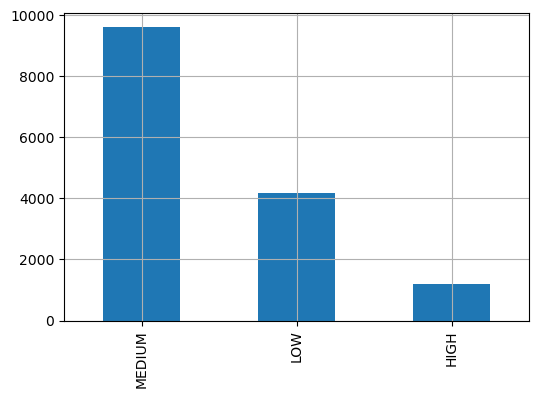

In [28]:
train.Income.value_counts().plot(kind= 'bar')
plt.show()

# DATA CLEANING

In [29]:
train.drop(["ID"],axis=1, inplace=True) # due to uniqueness of ID variable we drop this variable

C:\Users\Deepika\AppData\Local\Temp\ipykernel_9168\684190217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["ID"],axis=1, inplace=True) # due to uniqueness of ID variable we drop this variable


C:\Users\Deepika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


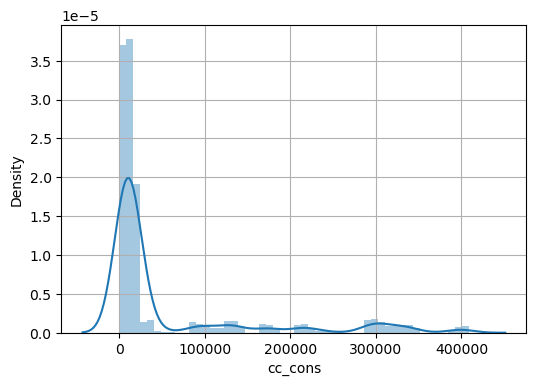

In [30]:
## The Distribution of Y variable should be normally distributed ( Assumption of linear regression)
sns.distplot(train.cc_cons)
plt.show()

C:\Users\Deepika\AppData\Local\Temp\ipykernel_9168\1011205328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ln_cc_cons']= np.log(train['cc_cons']+1)
C:\Users\Deepika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


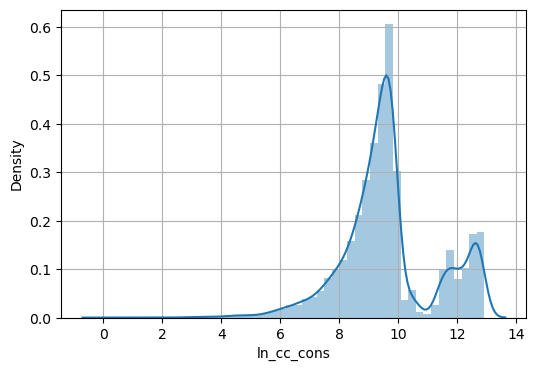

In [31]:
train['ln_cc_cons']= np.log(train['cc_cons']+1)
sns.distplot(train.ln_cc_cons)
plt.show()

In [32]:
train.columns

Index(['cc_cons', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active', 'ln_cc_cons'], dtype='object')

# SEPARATE NUMERICAL AND CATEGORICAL VARIABLE

In [34]:
numeric_var_names = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int']]
cat_var_names = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]

print( numeric_var_names)
print(cat_var_names)


['cc_cons', 'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'ln_cc_cons']
['account_type', 'gender', 'Income', 'loan_enq']


In [35]:
train_num=train[numeric_var_names]
train_num.head(5)

cc_cons  age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  ln_cc_cons
0  20014.0   35              15.0                 1        708.0                0                          17.0     24893.00       378.00     10288.00     29664.00     16291.40     11432.00           2.0            26            10            48            14            47    430000                     1                    1                   1.0                    1        593.20       1244.14         787.0        6885.0          85919.48           25192.00             24.0                 6                25296.0          11527.50          191777.13                 2               40                24563.0          30051.32            12761.0                 2               65                50836.0     1674.09    9.904237
1  10173.0   35              15.0                 6        123.0                0                          14.0     18941.62       966.00     20672.00       287.00      4217.00       885.00           1.0             7            13             3            21            31    127500                     1                    1                   1.0                    1     213557.15     172678.56       90525.0        1500.0          12255.75           88693.37             35.0                36                80750.0          92276.57           71162.00                 2               78                23948.0          42119.05            76206.0                21               63                23226.0    13043.34    9.227591
2  16095.0   55              24.5                 1        802.0                1                           3.0      5678.87      2724.00      1964.50      3933.11     23956.25      5168.00          43.0            32           102             4             1            80    199999                     1                    1                   1.0                    1     165907.57     470000.00       25524.0        3735.0          34193.00           84880.00             72.0                 9                38466.0          19343.00           70978.00                 2               82                10752.0          58373.25            75283.0                 7                1                27036.0    25375.27    9.686326
3   7707.0   29               4.5                 6        867.0                1                           4.0     30489.50      1236.00     12609.88      9138.14     17521.00     13650.30          53.0             1            50             1             1            10    155000                     1                    1                   1.0                    1      81872.65     223379.40       48500.0       -4679.0          11558.23          236326.00             43.0                30                52732.0          43867.91           63033.84                23               38                12607.0          69851.51            68708.0                21               83                43037.0     3544.33    8.950014
4  96408.0   34              12.6                 4        802.0                1                           7.0      7441.40      6906.04      4364.00      1939.00      2121.00      6829.18          67.0            47            82            54            16            68    297000                     1                    1  

In [36]:
train_cat=train[cat_var_names]
train_cat.head(5)

account_type gender  Income loan_enq
0      current      M  MEDIUM        Y
1      current      M    HIGH        Y
2      current      M  MEDIUM        Y
3      current      F  MEDIUM        Y
4      current      M  MEDIUM      NaN

In [37]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=train_num.apply(lambda x: var_summary(x)).T

In [38]:
num_summary

N  NMISS           SUM           MEAN         MEDIAN           STD           VAR       MIN            P1           P5           P10            P25            P50            P75            P90           P95           P99           MAX
cc_cons                       15000.0    0.0  8.273659e+08   55157.729867   13364.000000  9.767097e+04  9.539619e+09      0.00    271.990000   1290.85000   2633.600000    6768.000000   13364.000000   20105.750000  219688.700000  3.098520e+05  3.952905e+05  4.083820e+05
age                           15000.0    0.0  7.168590e+05      47.790600      40.000000  3.063277e+01  9.383664e+02     25.00     27.000000     28.00000     29.000000      33.000000      40.000000      53.000000      64.000000  6.600000e+01  2.220000e+02  2.230000e+02
Emp_Tenure_Years              15000.0    0.0  2.277601e+05      15.184007       9.900000  2.031265e+01  4.126037e+02      0.50      0.900000      1.70000      2.700000       5.100000       9.900000      18.000000      31.000000  4.000000e+01  1.212000e+02  2.030000e+02
Tenure_with_Bank              15000.0    0.0  8.265000e+04       5.510000       6.000000  2.865783e+00  8.212714e+00      1.00      1.000000      1.00000      2.000000       3.000000       6.000000       8.000000      10.000000  1.000000e+01  1.000000e+01  1.000000e+01
region_code                   15000.0    0.0  8.976232e+06     598.415467     623.000000  2.200623e+02  4.842744e+04    123.00    233.000000    249.00000    269.000000     424.000000     623.000000     799.000000     883.000000  9.370000e+02  9.680000e+02  9.740000e+02
NetBanking_Flag               15000.0    0.0  1.079300e+04       0.719533       1.000000  4.492422e-01  2.018186e-01      0.00      0.000000      0.00000      0.000000       0.000000       1.000000       1.000000       1.000000  1.000000e+00  1.000000e+00  1.000000e+00
Avg_days_between_transaction  14999.0    1.0  1.657330e+05      11.049603      11.000000  5.492379e+00  3.016623e+01      2.00      2.000000      2.00000      3.000000       6.000000      11.000000      16.000000      19.000000  2.000000e+01  2.000000e+01  2.000000e+01
cc_cons_apr                   15000.0    0.0  2.693609e+08   17957.391719   10288.100000  2.518794e+04  6.344323e+08    253.00    658.766900   1239.40000   1918.970000    4411.027500   10288.100000   21405.000000   40998.681000  6.015714e+04  1.238253e+05  4.410313e+05
dc_cons_apr                   15000.0    0.0  1.225665e+08    8171.098287    3996.900000  1.477303e+04  2.182424e+08     19.35    153.140000    376.00000    658.500000    1634.000000    3996.900000    9339.020000   18435.367000  2.783500e+04  6.480400e+04  2.292550e+05
cc_cons_may                   15000.0    0.0  2.450558e+08   16337.054662    8695.030000  2.706085e+04  7.322896e+08    157.00    508.980000   1043.04000   1677.000000    3638.000000    8695.030000   18951.300000   36299.360000  5.488771e+04  1.264680e+05  1.117246e+06
dc_cons_may                   15000.0    0.0  1.155541e+08    7703.605203    3820.500000  1.898730e+04  3.605174e+08     22.00    156.951000    410.97000    743.700000    1643.500000    3820.500000    8212.000000   16077.960000  2.551215e+04  6.478654e+04  9.112235e+05
cc_cons_jun                   15000.0    0.0  1.819352e+08   12129.010832    6655.250000  1.848878e+04  3.418350e+08     65.00    334.000000    833.00000   1377.200000    3004.500000    6655.250000   14247.000000   27043.490000  4.012357e+04  8.696523e+04  3.829141e+05
dc_cons_jun                   15000.0    0.0  1.064609e+08    7097.395321    3327.000000  1.325170e+04  1.756074e+08     62.00    188.500000    389.00000    603.640000    1358.750000    3327.000000    7597.000000   15856.000000  2.414883e+04  7.163800e+04  2.333840e+05
cc_count_apr                  14999.0    1.0  6.223010e+05      41.489499      10.000000  9.743539e+01  9.493656e+03      1.00      1.000000      1.00000      2.000000       5.000000      10.000000      44.000000      80.000000  1.240000e+02  5.310000e+02 

In [40]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts(),x.unique()],
                    index=['N','NMISS','ColumnNames','UniqueValues'])

cat_summary=train.apply(lambda x:cat_summary(x)).T

In [41]:
cat_summary

N NMISS                                        ColumnNames                                       UniqueValues
cc_cons                       15000     0  6035.0      5
13260.0     5
6682.0      5
6203...  [20014.0, 10173.0, 16095.0, 7707.0, 96408.0, 1...
account_type                  15000     0  current    12727
saving      2273
Name: accoun...                                  [current, saving]
gender                        15000     0   M    12945
F     2055
Name: gender, dtype: int64                                             [M, F]
age                           15000     0  33     1290
47      921
32      809
53      76...  [35, 55, 29, 34, 27, 32, 28, 67, 37, 46, 38, 6...
Income                        15000     0  MEDIUM    9612
LOW       4188
HIGH      1200
N...                                [MEDIUM, HIGH, LOW]
Emp_Tenure_Years              15000     0  6.0      293
12.0     287
7.2      252
10.8   ...  [15.0, 24.5, 4.5, 12.600000000000001, 4.9, 4.8...
Tenure_with_Bank              15000     0  7     1562
6     1534
10    1527
4     1519
2 ...                    [1, 6, 4, 3, 5, 10, 7, 2, 9, 8]
region_code                   15000     0  249.0    395
867.0    280
683.0    271
355.0  ...  [708.0, 123.0, 802.0, 867.0, 958.0, 805.0, 448...
NetBanking_Flag               15000     0  1    10793
0     4207
Name: NetBanking_Flag, d...                                             [0, 1]
Avg_days_between_transaction  14999     1  19.0    849
16.0    830
6.0     824
14.0    81...  [17.0, 14.0, 3.0, 4.0, 7.0, 11.0, 18.0, 16.0, ...
cc_cons_apr                   15000     0  4286.86      13
27109.00     13
11925.20     1...  [24893.0, 18941.62, 5678.87, 30489.5, 7441.4, ...
dc_cons_apr                   15000     0  8762.00     27
703.00      26
36242.82    26
1...  [378.0, 966.0, 2724.0, 1236.0, 6906.04, 1597.5...
cc_cons_may                   15000     0  73629.66    13
3392.26     13
1131.95     13
1...  [10288.0, 20672.0, 1964.5, 12609.88, 4364.0, 1...
dc_cons_may                   15000     0  248.90      34
11209.00    28
1005.00     27
3...  [29664.0, 287.0, 3933.11, 9138.14, 1939.0, 104...
cc_cons_jun                   15000     0  16527.000    17
1659.500     15
16940.535    1...  [16291.4, 4217.0, 23956.25, 17521.0, 2121.0, 1...
dc_cons_jun                   15000     0  21126.0    46
17167.0    36
3501.5     34
1143...  [11432.0, 885.0, 5168.0, 13650.3, 6829.18, 628...
cc_count_apr                  14999     1  6.0      1257
1.0      1157
2.0       981
7.0 ...  [2.0, 1.0, 43.0, 53.0, 67.0, 6.0, 10.0, 26.0, ...
cc_count_may                  15000     0  10     1353
23      847
3       790
1       64...  [26, 7, 32, 1, 47, 2, 34, 4, 65, 66, 77, 36, 2...
cc_count_jun                  15000     0  50     997
4      824
5      553
35     537
44...  [10, 13, 102, 50, 82, 59, 5, 84, 87, 67, 9, 19...
dc_count_apr                  15000     0  1     2852
2     1528
3     1169
4      876
8 ...  [48, 3, 4, 1, 54, 25, 51, 57, 22, 18, 8, 82, 2...
dc_count_may                  15000     0  1     2452
2     2226
3     1343
4     1055
6 ...  [14, 21, 1, 16, 3, 44, 2, 18, 27, 9, 12, 36, 5...
dc_count_jun                  15000     0  1     1856
47     868
2      794
3      706
4 ...  [47, 31, 80, 10, 68, 12, 17, 7, 1, 34, 2, 9, 2...
card_lim                      15000     0  199999     278
371000     275
232000     234
4...  [430000, 127500, 199999, 155000, 297000, 15000...
personal_loan_active          15000     0  1    15000
Name: personal_loan_active, dtype: ...                                                [1]
vehicle_loan_active           15000     0  1    15000
Name: vehicle_loan_active, dtype: i...                                                [1]
personal_loan_closed          14999     1  1.0    14999
Name: personal_loan_closed, dtype...                                         [1.0, nan]
vehicle_loan_closed           15000     0  1    15000
Name: vehicle_loan_closed, dtype: i...                                                [1]
in

# HANDLING OUTLIERS

In [42]:
train_num=train_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))


In [43]:
train_num

cc_cons    age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  ln_cc_cons
0       20014.00   35.0              15.0                 1        708.0                0                          17.0     24893.00       378.00     10288.00     29664.00     16291.40     11432.00           2.0          26.0          10.0          48.0          14.0            47  430000.0                     1                    1                   1.0                    1       593.200       1244.14         787.0    6885.00000          85919.48         25192.0000             24.0               6.0                25296.0          11527.50          191777.13               2.0             40.0                24563.0          30051.32           12761.00                 2             65.0               50836.00     1674.09    9.904237
1       10173.00   35.0              15.0                 6        233.0                0                          14.0     18941.62       966.00     20672.00       287.00      4217.00       885.00           1.0           7.0          13.0           3.0          21.0            31  127500.0                     1                    1                   1.0                    1    213557.150     172678.56       90525.0    1500.00000          12255.75         88693.3700             35.0              36.0                80750.0          92276.57           71162.00               2.0             78.0                23948.0          42119.05           76206.00                21             63.0               23226.00    13043.34    9.227591
2       16095.00   55.0              24.5                 1        802.0                1                           3.0      5678.87      2724.00      1964.50      3933.11     23956.25      5168.00          43.0          32.0         102.0           4.0           1.0            80  199999.0                     1                    1                   1.0                    1    165907.570     470000.00       25524.0    3735.00000          34193.00         84880.0000             72.0               9.0                38466.0          19343.00           70978.00               2.0             82.0                10752.0          58373.25           75283.00                 7              1.0               27036.00    25375.27    9.686326
3        7707.00   29.0               4.5                 6        867.0                1                           4.0     30489.50      1236.00     12609.88      9138.14     17521.00     13650.30          53.0           1.0          50.0           1.0           1.0            10  155000.0                     1                    1                   1.0                    1     81872.650     223379.40       48500.0   -4679.00000          11558.23        236326.0000             43.0              30.0                52732.0          43867.91           63033.84              23.0             38.0                12607.0          69851.51           68708.00                21             83.0               43037.00     3544.33    8.950014
4       96408.00   34.0              12.6                 4        802.0                1                           7.0      7441.40      6906.04      4364.00      1939.00      2121.00      6829.18          67.0          47.0          82.0          54.0          16.0            68  297000.0   

# HANDLING MISSING VALUES

In [44]:
train_num = train_num.apply(missing_imputation)
train_num

cc_cons    age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  ln_cc_cons
0       20014.00   35.0              15.0                 1        708.0                0                          17.0     24893.00       378.00     10288.00     29664.00     16291.40     11432.00           2.0          26.0          10.0          48.0          14.0            47  430000.0                     1                    1                   1.0                    1       593.200       1244.14         787.0    6885.00000          85919.48         25192.0000             24.0               6.0                25296.0          11527.50          191777.13               2.0             40.0                24563.0          30051.32           12761.00                 2             65.0               50836.00     1674.09    9.904237
1       10173.00   35.0              15.0                 6        233.0                0                          14.0     18941.62       966.00     20672.00       287.00      4217.00       885.00           1.0           7.0          13.0           3.0          21.0            31  127500.0                     1                    1                   1.0                    1    213557.150     172678.56       90525.0    1500.00000          12255.75         88693.3700             35.0              36.0                80750.0          92276.57           71162.00               2.0             78.0                23948.0          42119.05           76206.00                21             63.0               23226.00    13043.34    9.227591
2       16095.00   55.0              24.5                 1        802.0                1                           3.0      5678.87      2724.00      1964.50      3933.11     23956.25      5168.00          43.0          32.0         102.0           4.0           1.0            80  199999.0                     1                    1                   1.0                    1    165907.570     470000.00       25524.0    3735.00000          34193.00         84880.0000             72.0               9.0                38466.0          19343.00           70978.00               2.0             82.0                10752.0          58373.25           75283.00                 7              1.0               27036.00    25375.27    9.686326
3        7707.00   29.0               4.5                 6        867.0                1                           4.0     30489.50      1236.00     12609.88      9138.14     17521.00     13650.30          53.0           1.0          50.0           1.0           1.0            10  155000.0                     1                    1                   1.0                    1     81872.650     223379.40       48500.0   -4679.00000          11558.23        236326.0000             43.0              30.0                52732.0          43867.91           63033.84              23.0             38.0                12607.0          69851.51           68708.00                21             83.0               43037.00     3544.33    8.950014
4       96408.00   34.0              12.6                 4        802.0                1                           7.0      7441.40      6906.04      4364.00      1939.00      2121.00      6829.18          67.0          47.0          82.0          54.0          16.0            68  297000.0   

In [45]:
train_cat = train_cat.apply(missing_imputation)
train_cat

account_type gender  Income loan_enq
0          current      M  MEDIUM        Y
1          current      M    HIGH        Y
2          current      M  MEDIUM        Y
3          current      F  MEDIUM        Y
4          current      M  MEDIUM        Y
...            ...    ...     ...      ...
14995      current      F     LOW        Y
14996      current      M  MEDIUM        Y
14997      current      M  MEDIUM        Y
14998      current      M  MEDIUM        Y
14999      current      M  MEDIUM        Y

[15000 rows x 4 columns]

In [46]:
print ("\nMissing values in numerical data :  ", train_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", train_cat.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


# CREATING DUMMY VARIABLES

In [47]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [48]:
cat_varlist=list(train_cat.columns)

In [49]:
for c_feature in cat_varlist:
    train_cat[c_feature]=train_cat[c_feature].astype('category')
    train_cat=create_dummies(train_cat,c_feature)

In [50]:
train_cat.sample(5)

account_type_saving  gender_M  Income_LOW  Income_MEDIUM
8488                     0         1           0              1
10023                    0         1           0              1
13183                    0         1           0              0
4859                     0         1           1              0
2765                     1         1           0              1

Now we have nice simple clean data for numerical and categorical both data frame, so now we can merge both data set

In [52]:
train_fin = pd.concat([train_num, train_cat], axis=1)
train_fin

cc_cons    age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  ln_cc_cons  account_type_saving  gender_M  Income_LOW  Income_MEDIUM
0       20014.00   35.0              15.0                 1        708.0                0                          17.0     24893.00       378.00     10288.00     29664.00     16291.40     11432.00           2.0          26.0          10.0          48.0          14.0            47  430000.0                     1                    1                   1.0                    1       593.200       1244.14         787.0    6885.00000          85919.48         25192.0000             24.0               6.0                25296.0          11527.50          191777.13               2.0             40.0                24563.0          30051.32           12761.00                 2             65.0               50836.00     1674.09    9.904237                    0         1           0              1
1       10173.00   35.0              15.0                 6        233.0                0                          14.0     18941.62       966.00     20672.00       287.00      4217.00       885.00           1.0           7.0          13.0           3.0          21.0            31  127500.0                     1                    1                   1.0                    1    213557.150     172678.56       90525.0    1500.00000          12255.75         88693.3700             35.0              36.0                80750.0          92276.57           71162.00               2.0             78.0                23948.0          42119.05           76206.00                21             63.0               23226.00    13043.34    9.227591                    0         1           0              0
2       16095.00   55.0              24.5                 1        802.0                1                           3.0      5678.87      2724.00      1964.50      3933.11     23956.25      5168.00          43.0          32.0         102.0           4.0           1.0            80  199999.0                     1                    1                   1.0                    1    165907.570     470000.00       25524.0    3735.00000          34193.00         84880.0000             72.0               9.0                38466.0          19343.00           70978.00               2.0             82.0                10752.0          58373.25           75283.00                 7              1.0               27036.00    25375.27    9.686326                    0         1           0              1
3        7707.00   29.0               4.5                 6        867.0                1                           4.0     30489.50      1236.00     12609.88      9138.14     17521.00     13650.30          53.0           1.0          50.0           1.0           1.0            10  155000.0                     1                    1                   1.0                    1     81872.650     223379.40       48500.0   -4679.00000          11558.23        236326.0000             43.0              30.0                52732.0          43867.91           63033.84              23.0             38.0                12607.0          69851.51           68708.00                21             83.0               43037.00     3544.33    8.950014                    0         0           0              1
4   

In [53]:
train_fin.drop('ln_cc_cons', axis= 1, inplace=True)

In [54]:
train_fin.shape

(15000, 48)

# EXPLORE DATA AND CHECK THE VARIABLE DISTRIBUTION FOR LINEAR REGRESSION MODELLING

C:\Users\Deepika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


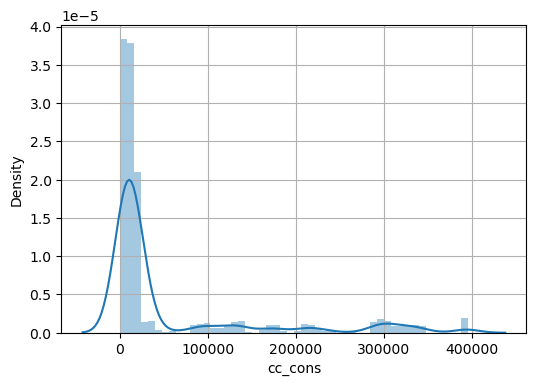

In [56]:
sns.distplot(train_fin.cc_cons)
plt.show()

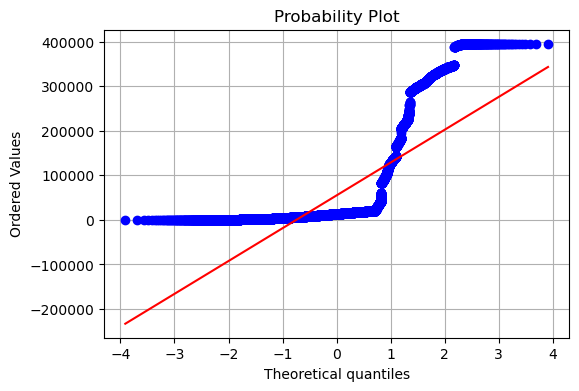

In [57]:
from scipy import stats
import pylab

stats.probplot(train_fin.cc_cons, dist="norm", plot=pylab )
pylab.show()

As we can see above graph our data is not distributed normally perfectly as discussed previously so we will use boxcox technique to make it perfect normal

In [58]:
train_fin['bc_cc_cons'],fitted_lambda = stats.boxcox(train_fin['cc_cons']+1)

C:\Users\Deepika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


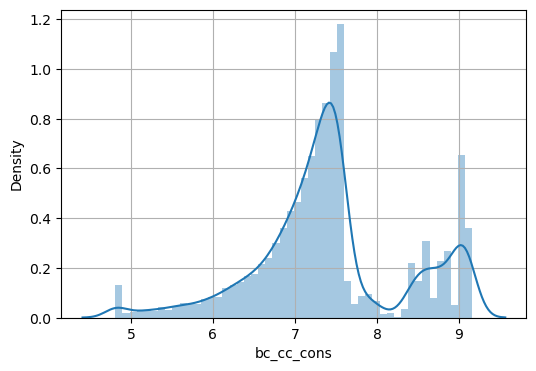

In [60]:
sns.distplot(train_fin.bc_cc_cons)
plt.show()

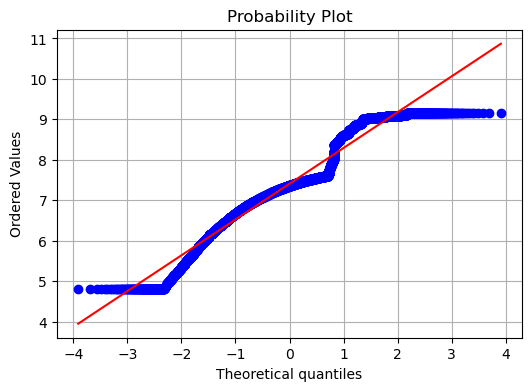

In [61]:
stats.probplot(train_fin.bc_cc_cons, dist="norm", plot=pylab )
pylab.show()

In [62]:
train_fin.drop('bc_cc_cons', axis=1, inplace=True)

In [63]:
train_fin.columns

Index(['cc_cons', 'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'account_type_saving', 'gender_M', 'Income_LOW', 'Income_MEDIUM'], dtype='object')

# SPLITTING THE DATA

In [65]:
feature_columns=train_fin.columns.difference(['cc_cons'])
feature_columns

Index(['Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income_LOW', 'Income_MEDIUM', 'NetBanking_Flag', 'Tenure_with_Bank', 'account_type_saving', 'age', 'card_lim', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may', 'cc_count_apr', 'cc_count_jun', 'cc_count_may', 'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may', 'credit_count_apr', 'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'dc_count_apr', 'dc_count_jun', 'dc_count_may', 'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may', 'debit_count_apr', 'debit_count_jun', 'debit_count_may', 'emi_active', 'gender_M', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'max_credit_amount_apr', 'max_credit_amount_jun', 'max_credit_amount_may', 'personal_loan_active', 'personal_loan_closed', 'region_code', 'vehicle_loan_active', 'vehicle_loan_closed'], dtype='object')

In [66]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(train_fin[feature_columns],
                                              train_fin['cc_cons'],
                                              test_size=0.2,
                                              random_state=12)

In [67]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

12000
3000
12000
3000


# RANDOM FOREST REGRESSION MODELLING

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid={'n_estimators':np.arange(5,25)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_x,train_y)  

GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])})

In [71]:
tree.best_params_ 

{'n_estimators': 22}

In [72]:
radm_clf = RandomForestRegressor(oob_score=False,n_estimators=12,max_depth=None)
radm_clf.fit( train_x, train_y)

RandomForestRegressor(n_estimators=12)

Prediction task over the test data that is test_x

In [73]:
pred_y = radm_clf.predict(test_x)

In [74]:
df = pd.DataFrame({'Real Values':test_y, 'Predicted Values':pred_y})
df

Real Values  Predicted Values
2429       18533.0      89276.415833
12906      18658.0      40538.583333
4969       13719.0      84850.083333
6326      211520.0      69951.083333
1662        5533.0     114555.416667
...            ...               ...
9260      239822.0      84214.416667
8730       12837.0      73296.416667
9991       83163.0      87221.166667
4959       15572.0      68489.500000
4200       94364.0      38759.583333

[3000 rows x 2 columns]

In [75]:
errors = abs((pred_y - test_y)/test_y)
print('Mean Absolute Percentage Error:', round(np.mean(errors), 5)) 

Mean Absolute Percentage Error: 12.58528


In [76]:
rmspe = np.sqrt(np.mean(np.square(((test_y - pred_y) / test_y)), axis=0))
print('Root Mean Squared Percentage Error (RMSPE)::', rmspe)

Root Mean Squared Percentage Error (RMSPE):: 38.88848770756477


In [77]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_y, pred_y, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_y, pred_y))
print('Explained Variance Score:', metrics.explained_variance_score(test_y, pred_y))
print('Max Error:', metrics.max_error(test_y, pred_y))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_y, pred_y))
print('Median Absolute Error:', metrics.median_absolute_error(test_y, pred_y))
print('R^2:', metrics.r2_score(test_y, pred_y))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_y, pred_y))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_y, pred_y))

Mean Absolute Error (MAE): 75454.55704027778
Mean Squared Error (MSE): 10403827803.808764
Root Mean Squared Error (RMSE): 101999.15589753065
Mean Absolute Percentage Error (MAPE): 12.585279484867215
Explained Variance Score: -0.12858010551945198
Max Error: 382752.46749999997
Mean Squared Log Error: 4.454840359676305
Median Absolute Error: 56588.291666666664
R^2: -0.14176189790093097
Mean Poisson Deviance: 130571.56706182538
Mean Gamma Deviance: 2.9525550644037493


In [78]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)

In [79]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.16 %.


# After building model we will apply our new model on new datasets that is test

Firstly for testing the model on new datasets, we have to do some data preprocessing steps as did earlier for the modelling purpose.

In [80]:
test.head()

ID  cc_cons account_type gender  age  Income  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun loan_enq  emi_active
15000  17591      NaN      current      M   37  MEDIUM              11.9                 4        575.0                1                          16.0      2795.45       1290.0      6141.05       676.50      9146.10     15479.00           4.0            10             4            47            56             6    125000                     1                    1                   1.0                    1         13.80     376600.50        1633.0   -5715.49023          27646.84           44341.00             16.0                36                24485.0          23512.67            41755.0                24               20                 9750.0          30527.88           31271.00                 3               12               25945.92        Y     1170.49
15001  13541      NaN      current      M   33  MEDIUM               7.8                 6        394.0                0                          19.0     29405.13       1640.0      1670.00      2463.92     10947.50       956.00           3.0            10             4            50            38            31     59000                     1                    1                   1.0                    1     101891.25     470000.00         891.0   35346.00000          32247.25           21946.00             42.0                 5                 3375.0          15049.44           130299.0                43               40                16967.0          14342.83           16582.00                 6               39               12214.00        Y    16447.45
15002  13431      NaN      current      M   53     LOW              33.0                10        324.0                1                          15.0      5985.20       6189.0      2696.09       766.00       716.00      4133.22           7.0            30             5            24            27             2     49999                     1                    1                   1.0                    1      53374.97     674291.83       54101.0    2557.00000          63169.00           36616.50             41.0                 6                14950.0         133659.00            40422.0                42               35                36398.0          32503.16           33539.54                 5                9               13215.00        Y     2622.28
15003   8687      NaN      current      M   33  MEDIUM               7.8                 5        370.0                1                           7.0      2105.93      18225.0     34763.56       167.00      4260.27     20185.00           1.0            99            71             5             1            11    520000                     1                    1                   1.0                    1       9118.35     470000.00        5905.0    5464.00000          39442.80           43173.38             46.0                 1               235844.0          99686.03            48148.0                 3                5                97825.0          93572.42          109429.75                21                0               72317.00        Y      340.79
15004  14727      NaN      current      M   62     LOW              12.6                 9        505.0                1                           3.0     

In [81]:
test.drop(['cc_cons','ID'],axis=1, inplace= True)

C:\Users\Deepika\AppData\Local\Temp\ipykernel_9168\3386394225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['cc_cons','ID'],axis=1, inplace= True)


In [82]:
# Find numerical variable in Data frame.
# This will return a list
numeric_var_names = [key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_names = [key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]

#Print the data frame
print( numeric_var_names)
print(cat_var_names)

['age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active']
['account_type', 'gender', 'Income', 'loan_enq']


In [83]:
test_num=test[numeric_var_names]
test_num.head(5)

age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active
15000   37              11.9                 4        575.0                1                          16.0      2795.45       1290.0      6141.05       676.50      9146.10     15479.00           4.0            10             4            47            56             6    125000                     1                    1                   1.0                    1         13.80     376600.50        1633.0   -5715.49023          27646.84           44341.00             16.0                36                24485.0          23512.67            41755.0                24               20                 9750.0          30527.88           31271.00                 3               12               25945.92     1170.49
15001   33               7.8                 6        394.0                0                          19.0     29405.13       1640.0      1670.00      2463.92     10947.50       956.00           3.0            10             4            50            38            31     59000                     1                    1                   1.0                    1     101891.25     470000.00         891.0   35346.00000          32247.25           21946.00             42.0                 5                 3375.0          15049.44           130299.0                43               40                16967.0          14342.83           16582.00                 6               39               12214.00    16447.45
15002   53              33.0                10        324.0                1                          15.0      5985.20       6189.0      2696.09       766.00       716.00      4133.22           7.0            30             5            24            27             2     49999                     1                    1                   1.0                    1      53374.97     674291.83       54101.0    2557.00000          63169.00           36616.50             41.0                 6                14950.0         133659.00            40422.0                42               35                36398.0          32503.16           33539.54                 5                9               13215.00     2622.28
15003   33               7.8                 5        370.0                1                           7.0      2105.93      18225.0     34763.56       167.00      4260.27     20185.00           1.0            99            71             5             1            11    520000                     1                    1                   1.0                    1       9118.35     470000.00        5905.0    5464.00000          39442.80           43173.38             46.0                 1               235844.0          99686.03            48148.0                 3                5                97825.0          93572.42          109429.75                21                0               72317.00      340.79
15004   62              12.6                 9        505.0                1                           3.0      3269.00       3532.0      3158.40      2699.77      3373.48      5120.00           2.0            10            47             5            25             1    152000                     1                    1                   1.0                    1   12850544.36        101.24      130000.0    1332.00

In [84]:
test_cat=test[cat_var_names]
test_cat.head(5)

account_type gender  Income loan_enq
15000      current      M  MEDIUM        Y
15001      current      M  MEDIUM        Y
15002      current      M     LOW        Y
15003      current      M  MEDIUM        Y
15004      current      M     LOW        Y

In [86]:
test_num=  test_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
test_num

age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active
15000  37.0              11.9                 4        575.0                1                          16.0     2795.450      1290.00      6141.05       676.50      9146.10     15479.00           4.0          10.0           4.0          47.0          56.0             6  125000.0                     1                    1                   1.0                    1         13.80     376600.50        1633.0   -5715.49023          27646.84           44341.00             16.0              36.0                24485.0          23512.67           41755.00              24.0             20.0                 9750.0          30527.88           31271.00                 3             12.0               25945.92     1170.49
15001  33.0               7.8                 6        394.0                0                          19.0    29405.130      1640.00      1670.00      2463.92     10947.50       956.00           3.0          10.0           4.0          50.0          38.0            31   59000.0                     1                    1                   1.0                    1     101891.25     470000.00         891.0   26601.00000          32247.25           21946.00             42.0               5.0                 3375.0          15049.44          130299.00              43.0             40.0                16967.0          14342.83           16582.00                 6             39.0               12214.00    16447.45
15002  53.0              33.0                10        324.0                1                          15.0     5985.200      6189.00      2696.09       766.00       716.00      4133.22           7.0          30.0           5.0          24.0          27.0             2   49999.0                     1                    1                   1.0                    1      53374.97     674291.83       54101.0    2557.00000          63169.00           36616.50             41.0               6.0                14950.0         133659.00           40422.00              42.0             35.0                36398.0          32503.16           33539.54                 5              9.0               13215.00     2622.28
15003  33.0               7.8                 5        370.0                1                           7.0     2105.930     18225.00     34763.56       167.00      4260.27     20185.00           1.0          99.0          71.0           5.0           1.0            11  520000.0                     1                    1                   1.0                    1       9118.35     470000.00        5905.0    5464.00000          39442.80           43173.38             46.0               1.0               235844.0          99686.03           48148.00               3.0              5.0                97825.0          93572.42          109429.75                21              0.0               72317.00      340.79
15004  62.0              12.6                 9        505.0                1                           3.0     3269.000      3532.00      3158.40      2699.77      3373.48      5120.00           2.0          10.0          47.0           5.0          25.0             1  152000.0                     1                    1                   1.0                    1   10535967.50        101.24      130000.0    13

In [87]:
test_num = test_num.apply(missing_imputation)
test_num

age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active
15000  37.0              11.9                 4        575.0                1                     16.000000     2795.450      1290.00      6141.05       676.50      9146.10     15479.00           4.0          10.0           4.0          47.0          56.0             6  125000.0                     1                    1                   1.0                    1         13.80     376600.50        1633.0   -5715.49023          27646.84           44341.00             16.0              36.0                24485.0          23512.67           41755.00              24.0             20.0                 9750.0          30527.88           31271.00                 3             12.0               25945.92     1170.49
15001  33.0               7.8                 6        394.0                0                     19.000000    29405.130      1640.00      1670.00      2463.92     10947.50       956.00           3.0          10.0           4.0          50.0          38.0            31   59000.0                     1                    1                   1.0                    1     101891.25     470000.00         891.0   26601.00000          32247.25           21946.00             42.0               5.0                 3375.0          15049.44          130299.00              43.0             40.0                16967.0          14342.83           16582.00                 6             39.0               12214.00    16447.45
15002  53.0              33.0                10        324.0                1                     15.000000     5985.200      6189.00      2696.09       766.00       716.00      4133.22           7.0          30.0           5.0          24.0          27.0             2   49999.0                     1                    1                   1.0                    1      53374.97     674291.83       54101.0    2557.00000          63169.00           36616.50             41.0               6.0                14950.0         133659.00           40422.00              42.0             35.0                36398.0          32503.16           33539.54                 5              9.0               13215.00     2622.28
15003  33.0               7.8                 5        370.0                1                      7.000000     2105.930     18225.00     34763.56       167.00      4260.27     20185.00           1.0          99.0          71.0           5.0           1.0            11  520000.0                     1                    1                   1.0                    1       9118.35     470000.00        5905.0    5464.00000          39442.80           43173.38             46.0               1.0               235844.0          99686.03           48148.00               3.0              5.0                97825.0          93572.42          109429.75                21              0.0               72317.00      340.79
15004  62.0              12.6                 9        505.0                1                      3.000000     3269.000      3532.00      3158.40      2699.77      3373.48      5120.00           2.0          10.0          47.0           5.0          25.0             1  152000.0                     1                    1                   1.0                    1   10535967.50        101.24      130000.0    13

In [88]:
test_cat = test_cat.apply(missing_imputation)
test_cat

account_type gender  Income loan_enq
15000      current      M  MEDIUM        Y
15001      current      M  MEDIUM        Y
15002      current      M     LOW        Y
15003      current      M  MEDIUM        Y
15004      current      M     LOW        Y
...            ...    ...     ...      ...
19995      current      M  MEDIUM        Y
19996      current      M  MEDIUM        Y
19997      current      M    HIGH        Y
19998      current      M  MEDIUM        Y
19999      current      M     LOW        Y

[5000 rows x 4 columns]

In [89]:
print ("\nMissing values in numerical data :  ", test_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", test_cat.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


In [90]:
cat_varlist=list(test_cat.columns)

In [91]:
for c_feature in cat_varlist:
    test_cat[c_feature]=test_cat[c_feature].astype('category')
    test_cat=create_dummies(test_cat,c_feature)

In [92]:
test_cat.sample(5)

account_type_saving  gender_M  Income_LOW  Income_MEDIUM
17735                    0         0           0              0
16096                    1         1           0              1
15584                    0         1           0              1
17493                    0         0           1              0
18296                    0         1           0              1

In [93]:
test_fin = pd.concat([test_num, test_cat], axis=1)

In [94]:
test_fin.head(5)

age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  account_type_saving  gender_M  Income_LOW  Income_MEDIUM
15000  37.0              11.9                 4        575.0                1                          16.0      2795.45       1290.0      6141.05       676.50      9146.10     15479.00           4.0          10.0           4.0          47.0          56.0             6  125000.0                     1                    1                   1.0                    1         13.80     376600.50        1633.0   -5715.49023          27646.84           44341.00             16.0              36.0                24485.0          23512.67            41755.0              24.0             20.0                 9750.0          30527.88           31271.00                 3             12.0               25945.92     1170.49                    0         1           0              1
15001  33.0               7.8                 6        394.0                0                          19.0     29405.13       1640.0      1670.00      2463.92     10947.50       956.00           3.0          10.0           4.0          50.0          38.0            31   59000.0                     1                    1                   1.0                    1     101891.25     470000.00         891.0   26601.00000          32247.25           21946.00             42.0               5.0                 3375.0          15049.44           130299.0              43.0             40.0                16967.0          14342.83           16582.00                 6             39.0               12214.00    16447.45                    0         1           0              1
15002  53.0              33.0                10        324.0                1                          15.0      5985.20       6189.0      2696.09       766.00       716.00      4133.22           7.0          30.0           5.0          24.0          27.0             2   49999.0                     1                    1                   1.0                    1      53374.97     674291.83       54101.0    2557.00000          63169.00           36616.50             41.0               6.0                14950.0         133659.00            40422.0              42.0             35.0                36398.0          32503.16           33539.54                 5              9.0               13215.00     2622.28                    0         1           1              0
15003  33.0               7.8                 5        370.0                1                           7.0      2105.93      18225.0     34763.56       167.00      4260.27     20185.00           1.0          99.0          71.0           5.0           1.0            11  520000.0                     1                    1                   1.0                    1       9118.35     470000.00        5905.0    5464.00000          39442.80           43173.38             46.0               1.0               235844.0          99686.03            48148.0               3.0              5.0                97825.0          93572.42          109429.75                21              0.0               72317.00      340.79                    0         1           0              1
15004  62.0              12.6                 9        505.0                1                           3.0      3269.00   

In [96]:
test_fin.shape

(5000, 47)

# MAKING PREDICTIONS

In [97]:
pred_cc_cons = radm_clf.predict(test_fin)

C:\Users\Deepika\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [98]:
pred_cc_cons=pd.DataFrame(pred_cc_cons.tolist())

In [99]:
pred_cc_cons.columns = ['pred_cc_cons']
pred_cc_cons

pred_cc_cons
0     152673.212500
1     233908.379167
2     257246.212500
3     220995.341667
4     195111.712500
...             ...
4995  220363.462500
4996  168221.129167
4997  222442.508333
4998  194075.712500
4999  160136.962500

[5000 rows x 1 columns]

In [100]:
test_fin.reset_index(inplace= True)
test_fin

index   age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  account_type_saving  gender_M  Income_LOW  Income_MEDIUM
0     15000  37.0              11.9                 4        575.0                1                     16.000000     2795.450      1290.00      6141.05       676.50      9146.10     15479.00           4.0          10.0           4.0          47.0          56.0             6  125000.0                     1                    1                   1.0                    1         13.80     376600.50        1633.0   -5715.49023          27646.84           44341.00             16.0              36.0                24485.0          23512.67           41755.00              24.0             20.0                 9750.0          30527.88           31271.00                 3             12.0               25945.92     1170.49                    0         1           0              1
1     15001  33.0               7.8                 6        394.0                0                     19.000000    29405.130      1640.00      1670.00      2463.92     10947.50       956.00           3.0          10.0           4.0          50.0          38.0            31   59000.0                     1                    1                   1.0                    1     101891.25     470000.00         891.0   26601.00000          32247.25           21946.00             42.0               5.0                 3375.0          15049.44          130299.00              43.0             40.0                16967.0          14342.83           16582.00                 6             39.0               12214.00    16447.45                    0         1           0              1
2     15002  53.0              33.0                10        324.0                1                     15.000000     5985.200      6189.00      2696.09       766.00       716.00      4133.22           7.0          30.0           5.0          24.0          27.0             2   49999.0                     1                    1                   1.0                    1      53374.97     674291.83       54101.0    2557.00000          63169.00           36616.50             41.0               6.0                14950.0         133659.00           40422.00              42.0             35.0                36398.0          32503.16           33539.54                 5              9.0               13215.00     2622.28                    0         1           1              0
3     15003  33.0               7.8                 5        370.0                1                      7.000000     2105.930     18225.00     34763.56       167.00      4260.27     20185.00           1.0          99.0          71.0           5.0           1.0            11  520000.0                     1                    1                   1.0                    1       9118.35     470000.00        5905.0    5464.00000          39442.80           43173.38             46.0               1.0               235844.0          99686.03           48148.00               3.0              5.0                97825.0          93572.42          109429.75                21              0.0               72317.00      340.79                    0         1           0              1
4     15004  62.0              12.6                 9        505.0                1        

In [101]:
new_data_output = pd.concat([test_fin, pred_cc_cons], axis=1)

new_data_output.head()

index   age  Emp_Tenure_Years  Tenure_with_Bank  region_code  NetBanking_Flag  Avg_days_between_transaction  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  dc_count_apr  dc_count_may  dc_count_jun  card_lim  personal_loan_active  vehicle_loan_active  personal_loan_closed  vehicle_loan_closed  investment_1  investment_2  investment_3  investment_4  debit_amount_apr  credit_amount_apr  debit_count_apr  credit_count_apr  max_credit_amount_apr  debit_amount_may  credit_amount_may  credit_count_may  debit_count_may  max_credit_amount_may  debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  account_type_saving  gender_M  Income_LOW  Income_MEDIUM   pred_cc_cons
0  15000  37.0              11.9                 4        575.0                1                          16.0      2795.45       1290.0      6141.05       676.50      9146.10     15479.00           4.0          10.0           4.0          47.0          56.0             6  125000.0                     1                    1                   1.0                    1         13.80     376600.50        1633.0   -5715.49023          27646.84           44341.00             16.0              36.0                24485.0          23512.67            41755.0              24.0             20.0                 9750.0          30527.88           31271.00                 3             12.0               25945.92     1170.49                    0         1           0              1  152673.212500
1  15001  33.0               7.8                 6        394.0                0                          19.0     29405.13       1640.0      1670.00      2463.92     10947.50       956.00           3.0          10.0           4.0          50.0          38.0            31   59000.0                     1                    1                   1.0                    1     101891.25     470000.00         891.0   26601.00000          32247.25           21946.00             42.0               5.0                 3375.0          15049.44           130299.0              43.0             40.0                16967.0          14342.83           16582.00                 6             39.0               12214.00    16447.45                    0         1           0              1  233908.379167
2  15002  53.0              33.0                10        324.0                1                          15.0      5985.20       6189.0      2696.09       766.00       716.00      4133.22           7.0          30.0           5.0          24.0          27.0             2   49999.0                     1                    1                   1.0                    1      53374.97     674291.83       54101.0    2557.00000          63169.00           36616.50             41.0               6.0                14950.0         133659.00            40422.0              42.0             35.0                36398.0          32503.16           33539.54                 5              9.0               13215.00     2622.28                    0         1           1              0  257246.212500
3  15003  33.0               7.8                 5        370.0                1                           7.0      2105.93      18225.0     34763.56       167.00      4260.27     20185.00           1.0          99.0          71.0           5.0           1.0            11  520000.0                     1                    1                   1.0                    1       9118.35     470000.00        5905.0    5464.00000          39442.80           43173.38             46.0               1.0               235844.0          99686.03            48148.0               3.0              5.0                97825.0          93572.42          109429.75                21              0.0               72317.00      340.79                    0         1           0              1  220995.341667
4  15004  62.0              

# FEATURE IMPORTANCE RANDOM FOREST

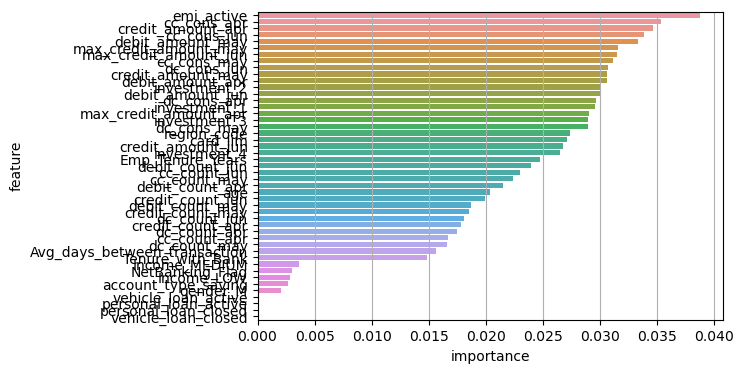

In [107]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )
plt.show()

In [108]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

feature_rank

rank                       feature  importance
0      1                    emi_active    0.038782
1      2                   cc_cons_apr    0.035315
2      3             credit_amount_apr    0.034601
3      4                   cc_cons_jun    0.033818
4      5              debit_amount_may    0.033281
5      6         max_credit_amount_may    0.031542
6      7         max_credit_amount_jun    0.031475
7      8                   cc_cons_may    0.031107
8      9                   dc_cons_jun    0.030729
9     10             credit_amount_may    0.030600
10    11              debit_amount_apr    0.030597
11    12                  investment_2    0.029976
12    13              debit_amount_jun    0.029948
13    14                   dc_cons_apr    0.029612
14    15                  investment_1    0.029569
15    16         max_credit_amount_apr    0.029037
16    17                  investment_3    0.028950
17    18                   dc_cons_may    0.028938
18    19                   region_code    0.027366
19    20                      card_lim    0.027101
20    21             credit_amount_jun    0.026738
21    22                  investment_4    0.026500
22    23              Emp_Tenure_Years    0.024731
23    24               debit_count_jun    0.023945
24    25                  cc_count_jun    0.022967
25    26                  cc_count_may    0.022400
26    27               debit_count_apr    0.021459
27    28                           age    0.020396
28    29              credit_count_jun    0.019938
29    30               debit_count_may    0.018702
30    31              credit_count_may    0.018531
31    32                  dc_count_jun    0.018064
32    33              credit_count_apr    0.017831
33    34                  dc_count_apr    0.017441
34    35                  cc_count_apr    0.016710
35    36                  dc_count_may    0.016571
36    37  Avg_days_between_transaction    0.015610
37    38              Tenure_with_Bank    0.014806
38    39                 Income_MEDIUM    0.003674
39    40               NetBanking_Flag    0.003003
40    41                    Income_LOW    0.002869
41    42           account_type_saving    0.002678
42    43                      gender_M    0.002089
43    44           vehicle_loan_active    0.000000
44    45          personal_loan_active    0.000000
45    46          personal_loan_closed    0.000000
46    47           vehicle_loan_closed    0.000000

In [109]:
#Select features and then convert it into list
x=feature_rank.loc[0:75,['feature']]
x=x['feature'].tolist()
print(x)

['emi_active', 'cc_cons_apr', 'credit_amount_apr', 'cc_cons_jun', 'debit_amount_may', 'max_credit_amount_may', 'max_credit_amount_jun', 'cc_cons_may', 'dc_cons_jun', 'credit_amount_may', 'debit_amount_apr', 'investment_2', 'debit_amount_jun', 'dc_cons_apr', 'investment_1', 'max_credit_amount_apr', 'investment_3', 'dc_cons_may', 'region_code', 'card_lim', 'credit_amount_jun', 'investment_4', 'Emp_Tenure_Years', 'debit_count_jun', 'cc_count_jun', 'cc_count_may', 'debit_count_apr', 'age', 'credit_count_jun', 'debit_count_may', 'credit_count_may', 'dc_count_jun', 'credit_count_apr', 'dc_count_apr', 'cc_count_apr', 'dc_count_may', 'Avg_days_between_transaction', 'Tenure_with_Bank', 'Income_MEDIUM', 'NetBanking_Flag', 'Income_LOW', 'account_type_saving', 'gender_M', 'vehicle_loan_active', 'personal_loan_active', 'personal_loan_closed', 'vehicle_loan_closed']


In [114]:
# Create data frame with selected features
rf_features=['emi_active', 'cc_cons_may', 'cc_cons_apr', 'cc_cons_jun', 'max_credit_amount_jun', 
             'investment_1', 'debit_amount_may', 'credit_amount_apr', 'max_credit_amount_apr', 
             'dc_cons_jun', 'dc_cons_apr', 'debit_amount_jun', 'max_credit_amount_may',
             'credit_amount_jun', 'debit_amount_apr', 'credit_amount_may', 'dc_cons_may', 
             'investment_3', 'investment_2', 'Emp_Tenure_Years', 'card_lim', 'region_code', 'investment_4',
             'cc_count_jun', 
             'debit_count_jun', 'debit_count_apr', 'cc_count_may', 'debit_count_may', 'age', 'credit_count_may', 
             'credit_count_jun', 'Avg_days_between_transaction', 'dc_count_jun', 'cc_count_apr', 'dc_count_may', 
             'dc_count_apr', 'credit_count_apr', 'Tenure_with_Bank', 'NetBanking_Flag', 'account_type_saving',
             'Income_LOW', 'gender_M', 
             'Income_MEDIUM', 'vehicle_loan_active', 'personal_loan_active', 'personal_loan_closed', 'vehicle_loan_closed']
rf_features.append('cc_cons')
df_rf= train_fin[rf_features]
df_rf.head(5)


emi_active  cc_cons_may  cc_cons_apr  cc_cons_jun  max_credit_amount_jun  investment_1  debit_amount_may  credit_amount_apr  max_credit_amount_apr  dc_cons_jun  dc_cons_apr  debit_amount_jun  max_credit_amount_may  credit_amount_jun  debit_amount_apr  credit_amount_may  dc_cons_may  investment_3  investment_2  Emp_Tenure_Years  card_lim  region_code  investment_4  cc_count_jun  debit_count_jun  debit_count_apr  cc_count_may  debit_count_may   age  credit_count_may  credit_count_jun  Avg_days_between_transaction  dc_count_jun  cc_count_apr  dc_count_may  dc_count_apr  credit_count_apr  Tenure_with_Bank  NetBanking_Flag  account_type_saving  Income_LOW  gender_M  Income_MEDIUM  vehicle_loan_active  personal_loan_active  personal_loan_closed  vehicle_loan_closed  cc_cons
0     1674.09     10288.00     24893.00     16291.40                50836.0        593.20          11527.50           25192.00                25296.0     11432.00       378.00          30051.32                24563.0            12761.0          85919.48          191777.13     29664.00         787.0       1244.14              15.0  430000.0        708.0        6885.0          10.0             65.0             24.0          26.0             40.0  35.0               2.0                 2                          17.0            47           2.0          14.0          48.0               6.0                 1                0                    0           0         1              1                    1                     1                   1.0                    1  20014.0
1    13043.34     20672.00     18941.62      4217.00                23226.0     213557.15          92276.57           88693.37                80750.0       885.00       966.00          42119.05                23948.0            76206.0          12255.75           71162.00       287.00       90525.0     172678.56              15.0  127500.0        233.0        1500.0          13.0             63.0             35.0           7.0             78.0  35.0               2.0                21                          14.0            31           1.0          21.0           3.0              36.0                 6                0                    0           0         1              0                    1                     1                   1.0                    1  10173.0
2    25375.27      1964.50      5678.87     23956.25                27036.0     165907.57          19343.00           84880.00                38466.0      5168.00      2724.00          58373.25                10752.0            75283.0          34193.00           70978.00      3933.11       25524.0     470000.00              24.5  199999.0        802.0        3735.0         102.0              1.0             72.0          32.0             82.0  55.0               2.0                 7                           3.0            80          43.0           1.0           4.0               9.0                 1                1                    0           0         1              1                    1                     1                   1.0                    1  16095.0
3     3544.33     12609.88     30489.50     17521.00                43037.0      81872.65          43867.91          236326.00                52732.0     13650.30      1236.00          69851.51                12607.0            68708.0          11558.23           63033.84      9138.14       48500.0     223379.40               4.5  155000.0        867.0       -4679.0          50.0             83.0             43.0           1.0             38.0  29.0              23.0                21                           4.0            10          53.0           1.0           1.0              30.0                 6                1                    0           0         0              1                    1                     1                   1.0                    1   7707.0
4    12780.44      4364.00      7441.40      2121.00                32044.0        568.80    

# VISUALIZING A SINGLE DECISION TREE

One of the coolest parts of the Random Forest implementation in Skicit-learn is we can actually examine any of the trees in the forest. We will select one tree, and save the whole tree as an image. The following code takes one tree from the forest and saves it as an image.

In [115]:
feature_list = list(df_rf.columns)

In [123]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = radm_clf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = radm_clf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')


In [127]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_x, train_y)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')



# VARIABLE IMPORTANCE (METHOD 2)

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. we can use the numbers to make relative comparisons between variables.

In [128]:
# Get numerical feature importances
importances = list(radm_clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(train_fin, round(importance, 5)) for train_fin, importance in zip(feature_columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: emi_active           Importance: 0.03878
Variable: cc_cons_apr          Importance: 0.03531
Variable: credit_amount_apr    Importance: 0.0346
Variable: cc_cons_jun          Importance: 0.03382
Variable: debit_amount_may     Importance: 0.03328
Variable: max_credit_amount_may Importance: 0.03154
Variable: max_credit_amount_jun Importance: 0.03148
Variable: cc_cons_may          Importance: 0.03111
Variable: dc_cons_jun          Importance: 0.03073
Variable: credit_amount_may    Importance: 0.0306
Variable: debit_amount_apr     Importance: 0.0306
Variable: investment_2         Importance: 0.02998
Variable: debit_amount_jun     Importance: 0.02995
Variable: dc_cons_apr          Importance: 0.02961
Variable: investment_1         Importance: 0.02957
Variable: max_credit_amount_apr Importance: 0.02904
Variable: investment_3         Importance: 0.02895
Variable: dc_cons_may          Importance: 0.02894
Variable: region_code          Importance: 0.02737
Variable: card_lim             

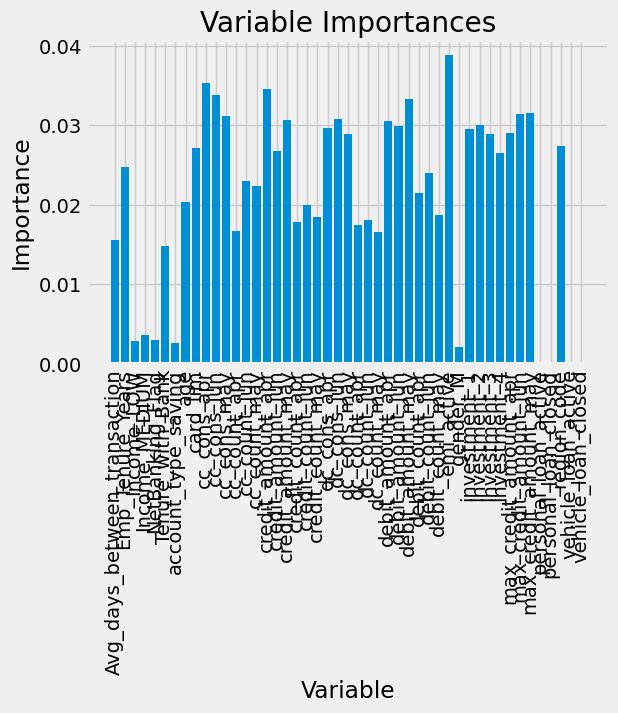

In [129]:
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

As model is made successfully and tested also, now for our sake of knowledge we will still see the remaining assumption of the linear regression

# FINDING MULTICOLLINEARITY USING VIF

In [130]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [131]:
del rf_features[-1]

In [132]:
df_rf['ln_cc_cons']= np.log(df_rf['cc_cons']+1)
rf_features=df_rf.columns
rf_features

C:\Users\Deepika\AppData\Local\Temp\ipykernel_9168\1181543194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf['ln_cc_cons']= np.log(df_rf['cc_cons']+1)


Index(['emi_active', 'cc_cons_may', 'cc_cons_apr', 'cc_cons_jun', 'max_credit_amount_jun', 'investment_1', 'debit_amount_may', 'credit_amount_apr', 'max_credit_amount_apr', 'dc_cons_jun', 'dc_cons_apr', 'debit_amount_jun', 'max_credit_amount_may', 'credit_amount_jun', 'debit_amount_apr', 'credit_amount_may', 'dc_cons_may', 'investment_3', 'investment_2', 'Emp_Tenure_Years', 'card_lim', 'region_code', 'investment_4', 'cc_count_jun', 'debit_count_jun', 'debit_count_apr', 'cc_count_may', 'debit_count_may', 'age', 'credit_count_may', 'credit_count_jun', 'Avg_days_between_transaction', 'dc_count_jun', 'cc_count_apr', 'dc_count_may', 'dc_count_apr', 'credit_count_apr', 'Tenure_with_Bank', 'NetBanking_Flag', 'account_type_saving', 'Income_LOW', 'gender_M', 'Income_MEDIUM', 'vehicle_loan_active', 'personal_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'cc_cons', 'ln_cc_cons'], dtype='object')

In [134]:
features = "+".join(rf_features)
features

'emi_active+cc_cons_may+cc_cons_apr+cc_cons_jun+max_credit_amount_jun+investment_1+debit_amount_may+credit_amount_apr+max_credit_amount_apr+dc_cons_jun+dc_cons_apr+debit_amount_jun+max_credit_amount_may+credit_amount_jun+debit_amount_apr+credit_amount_may+dc_cons_may+investment_3+investment_2+Emp_Tenure_Years+card_lim+region_code+investment_4+cc_count_jun+debit_count_jun+debit_count_apr+cc_count_may+debit_count_may+age+credit_count_may+credit_count_jun+Avg_days_between_transaction+dc_count_jun+cc_count_apr+dc_count_may+dc_count_apr+credit_count_apr+Tenure_with_Bank+NetBanking_Flag+account_type_saving+Income_LOW+gender_M+Income_MEDIUM+vehicle_loan_active+personal_loan_active+personal_loan_closed+vehicle_loan_closed+cc_cons+ln_cc_cons'

In [135]:
y, X = dmatrices('ln_cc_cons~' + features,df_rf, return_type='dataframe')

In [136]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\Deepika\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [137]:
vif.sort_values(by=['VIF Factor'],ascending=False)

VIF Factor                      features
43    3.244121                 Income_MEDIUM
41    3.243761                    Income_LOW
49    3.156106                    ln_cc_cons
48    3.154870                       cc_cons
29    2.999633                           age
20    2.998186              Emp_Tenure_Years
2     1.004655                   cc_cons_may
25    1.004454               debit_count_jun
22    1.003855                   region_code
17    1.003760                   dc_cons_may
38    1.003653              Tenure_with_Bank
28    1.003651               debit_count_may
35    1.003649                  dc_count_may
5     1.003573         max_credit_amount_jun
4     1.003539                   cc_cons_jun
7     1.003324              debit_amount_may
26    1.003213               debit_count_apr
36    1.003145                  dc_count_apr
15    1.003072              debit_amount_apr
18    1.003011                  investment_3
33    1.003000                  dc_count_jun
30    1.002940              credit_count_may
12    1.002926              debit_amount_jun
40    1.002915           account_type_saving
39    1.002914               NetBanking_Flag
37    1.002849              credit_count_apr
13    1.002811         max_credit_amount_may
9     1.002799         max_credit_amount_apr
31    1.002768              credit_count_jun
34    1.002757                  cc_count_apr
19    1.002746                  investment_2
24    1.002691                  cc_count_jun
27    1.002599                  cc_count_may
1     1.002553                    emi_active
32    1.002520  Avg_days_between_transaction
16    1.002473             credit_amount_may
23    1.002471                  investment_4
42    1.002459                      gender_M
11    1.002407                   dc_cons_apr
8     1.002344             credit_amount_apr
6     1.002192                  investment_1
10    1.002183                   dc_cons_jun
3     1.002038                   cc_cons_apr
14    1.001911             credit_amount_jun
21    1.001899                      card_lim
44    0.000000           vehicle_loan_active
45    0.000000          personal_loan_active
46    0.000000          personal_loan_closed
47    0.000000           vehicle_loan_closed
0     0.000000                     Intercept

In [138]:
vif1=vif[vif['VIF Factor']<10].reset_index().loc[:,['features']]
vif1

features
0                      Intercept
1                     emi_active
2                    cc_cons_may
3                    cc_cons_apr
4                    cc_cons_jun
5          max_credit_amount_jun
6                   investment_1
7               debit_amount_may
8              credit_amount_apr
9          max_credit_amount_apr
10                   dc_cons_jun
11                   dc_cons_apr
12              debit_amount_jun
13         max_credit_amount_may
14             credit_amount_jun
15              debit_amount_apr
16             credit_amount_may
17                   dc_cons_may
18                  investment_3
19                  investment_2
20              Emp_Tenure_Years
21                      card_lim
22                   region_code
23                  investment_4
24                  cc_count_jun
25               debit_count_jun
26               debit_count_apr
27                  cc_count_may
28               debit_count_may
29                           age
30              credit_count_may
31              credit_count_jun
32  Avg_days_between_transaction
33                  dc_count_jun
34                  cc_count_apr
35                  dc_count_may
36                  dc_count_apr
37              credit_count_apr
38              Tenure_with_Bank
39               NetBanking_Flag
40           account_type_saving
41                    Income_LOW
42                      gender_M
43                 Income_MEDIUM
44           vehicle_loan_active
45          personal_loan_active
46          personal_loan_closed
47           vehicle_loan_closed
48                       cc_cons
49                    ln_cc_cons

In [139]:
df_rf.shape

(15000, 49)

# CHECKING X VARIABLE HAVE LINEAR RELATIONSHIP WITH Y VARIABLE

In [142]:
feature_columns=df_rf.columns.difference(['ln_cc_cons','Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income_LOW', 'Income_MEDIUM',
                                          'NetBanking_Flag', 'Tenure_with_Bank', 'account_type_saving', 'age', 
                                          'card_lim', 'cc_cons', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may', 'cc_count_apr', 'cc_count_jun',
                                          'cc_count_may', 'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may', 'credit_count_apr', 
                                          'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'dc_count_apr', 
                                          'dc_count_jun', 'dc_count_may', 'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may', 'debit_count_apr',
                                          'debit_count_jun', 'debit_count_may', 'emi_active', 'gender_M', 'investment_1', 'investment_2', 'investment_3', 
                                          'investment_4', 'max_credit_amount_apr', 'max_credit_amount_jun', 'max_credit_amount_may', ])
print(list(feature_columns))

['personal_loan_active', 'personal_loan_closed', 'region_code', 'vehicle_loan_active', 'vehicle_loan_closed']


In [143]:
train_x,test_x,train_y,test_y=train_test_split(df_rf[feature_columns],
                                              df_rf['ln_cc_cons'],
                                               test_size=.2,
                                               random_state=123)

In [145]:
import statsmodels.api as sm
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

In [146]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_cc_cons   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9816
Date:                Wed, 22 Feb 2023   Prob (F-statistic):              0.322
Time:                        20:57:59   Log-Likelihood:                -22550.
No. Observations:               12000   AIC:                         4.510e+04
Df Residuals:                   11998   BIC:                         4.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
personal_loan_active     2.4229 

In [147]:
lm.pvalues.sort_values(ascending=False)

region_code             0.321833
personal_loan_active    0.000000
personal_loan_closed    0.000000
vehicle_loan_active     0.000000
vehicle_loan_closed     0.000000
dtype: float64

In [148]:
print('Parameters:', lm.params) # Find the parameters of x i.e Beta value
print('R2: ', lm.rsquared) # Find the r**2

Parameters: personal_loan_active    2.422876
personal_loan_closed    2.422876
region_code            -0.000066
vehicle_loan_active     2.422876
vehicle_loan_closed     2.422876
dtype: float64
R2:  8.180395700818632e-05


In [149]:
test_pred=lm.predict(test_x)
train_pred=lm.predict(train_x)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 2.425444407617333
MSE Train: 2.5106014200120366


In [150]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.1337071834027306
MSE: 2.425444407617333
RMSE: 1.557383834389369


In [151]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.124  |  MAPE of testing data:  0.121


# CHECKING NORMALITY OF RESIDUALS

We will use Q-Q plot to examine this

C:\Users\Deepika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


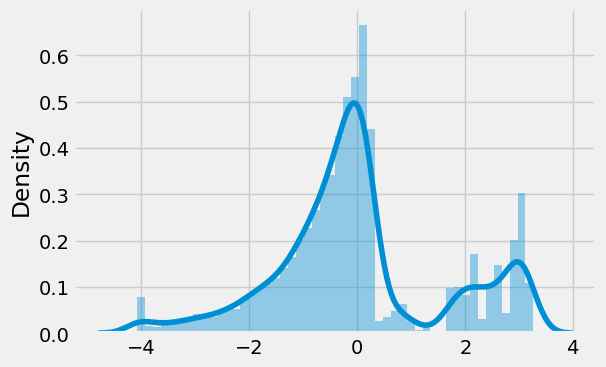

In [152]:
residuals=train_y-train_pred
sns.distplot(residuals)
plt.show()

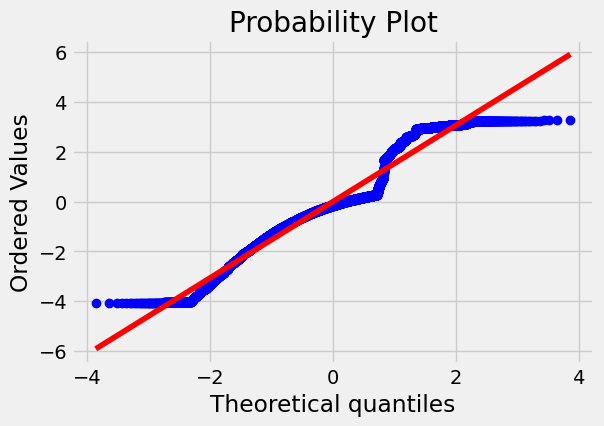

In [153]:
stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

From the above histogram and Q-Q plot, shows that the residuals are normally distributed, so our assumption is not violated